# Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
def epoch_time(path):
    """return the list of time spent of every epoch of training phase of a
    model given the path of the folder of the model"""
    with open(path) as f:
        content = f.readlines()
    return [float(a.split("spent in epoch: ")[1]) for a in content]

def cumulative_epoch_time(epoch_time):
    return [np.sum(epoch_time[:i+1]) for i in range(len(epoch_time))]

In [39]:
experiments = dict() #this dictionnary will save all the experiements informations
for key in ['train_ppls', 'val_ppls', 'train_losses', 'val_losses', 'batch_size',\
            'code_file','data', 'debug', 'dp_keep_prob', 'emb_size','evaluate',\
            'hidden_size', 'initial_lr', 'model', 'num_epochs', 'num_layers',\
            'optimizer', 'save_best', 'save_dir', 'seed','seq_len', 'epoch',\
            'epoch_time', 'cumulative_epoch_time', 'best_val', 'best_train',\
            'n_exp'] :
    experiments[key] = []

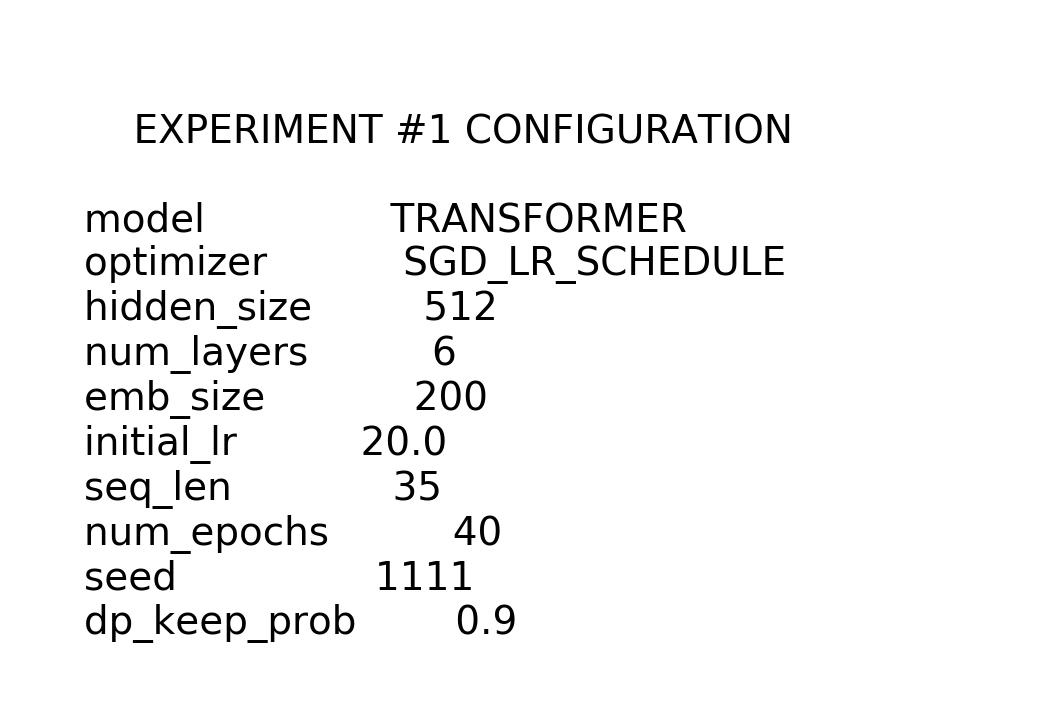

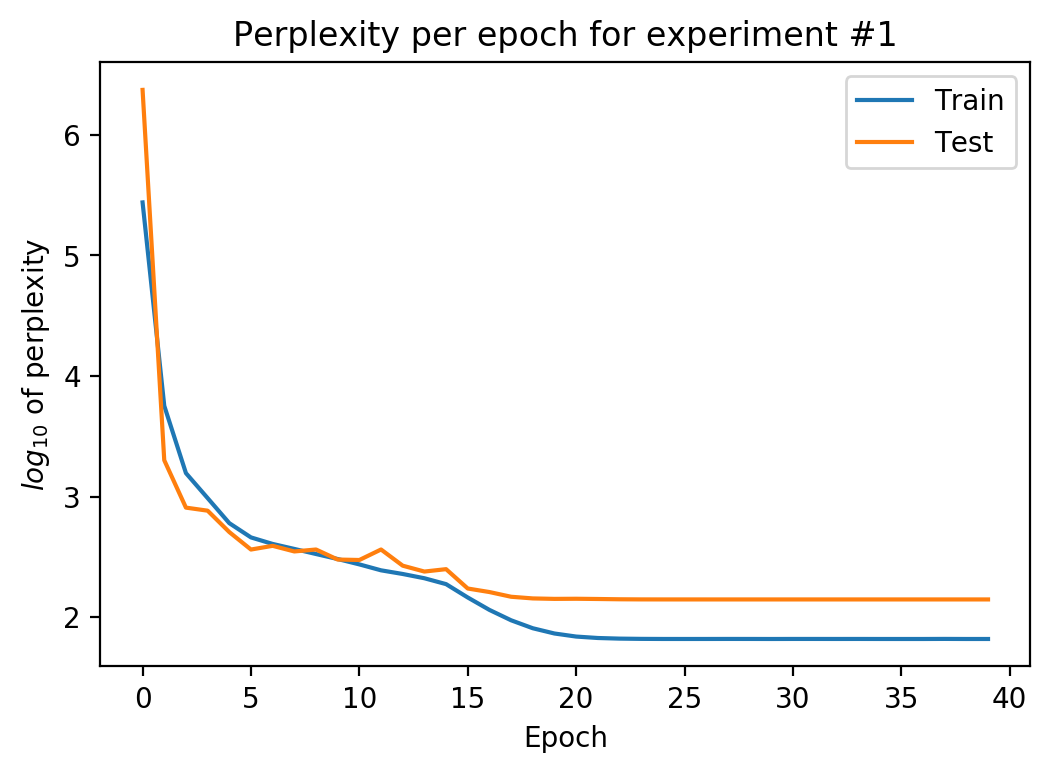

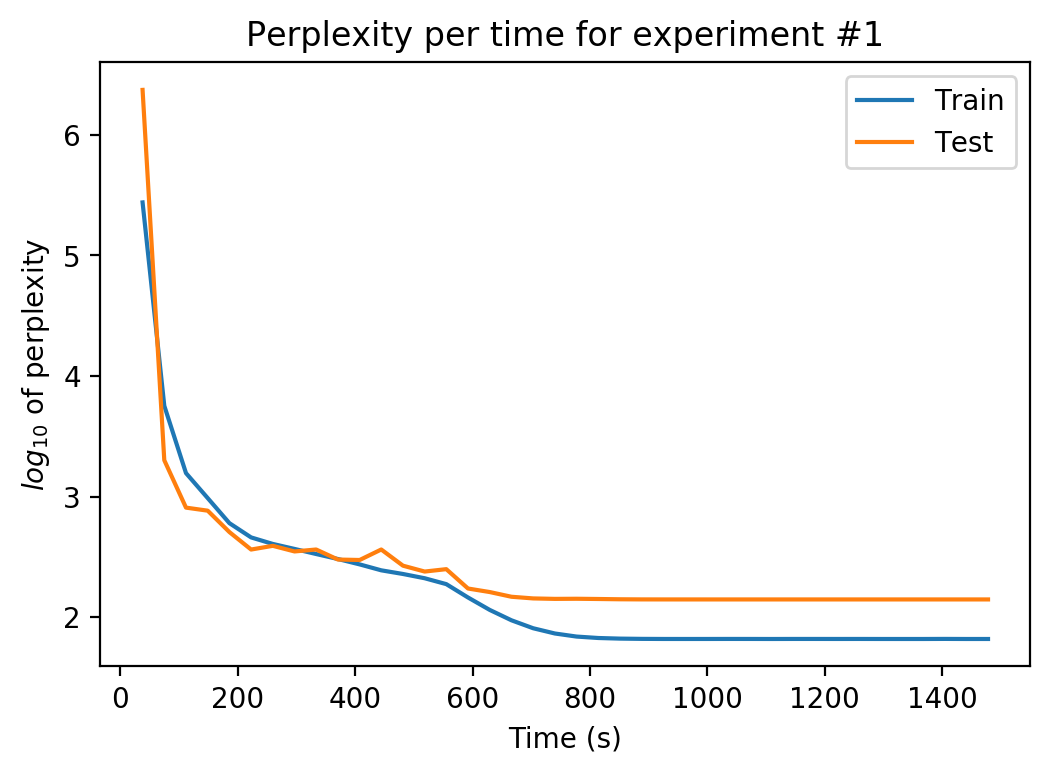

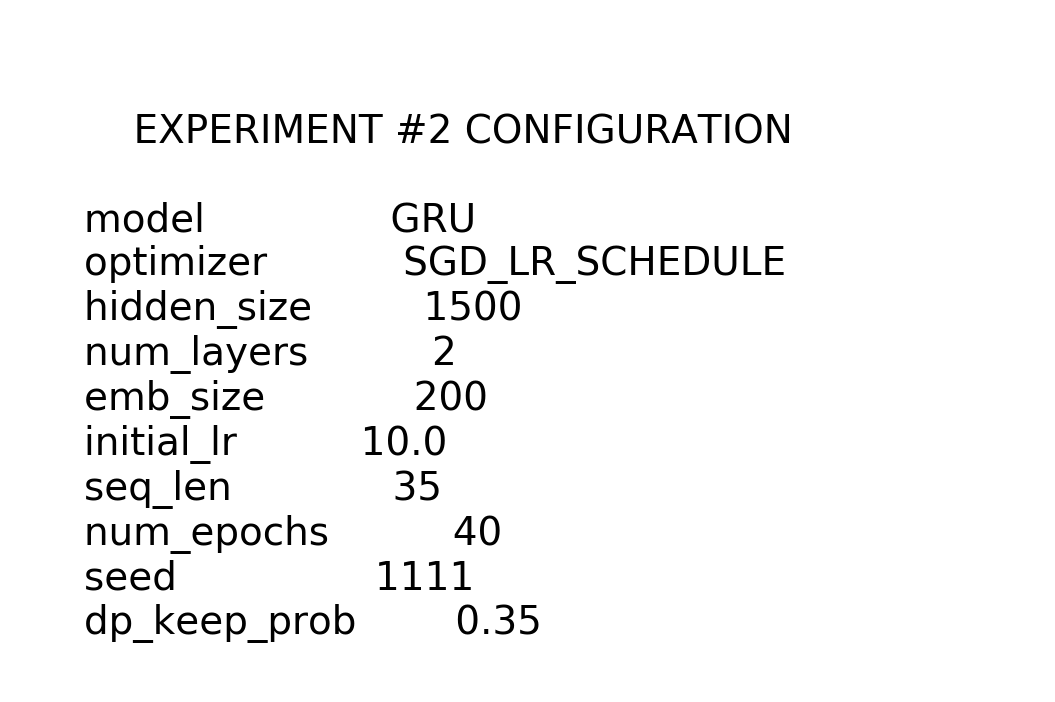

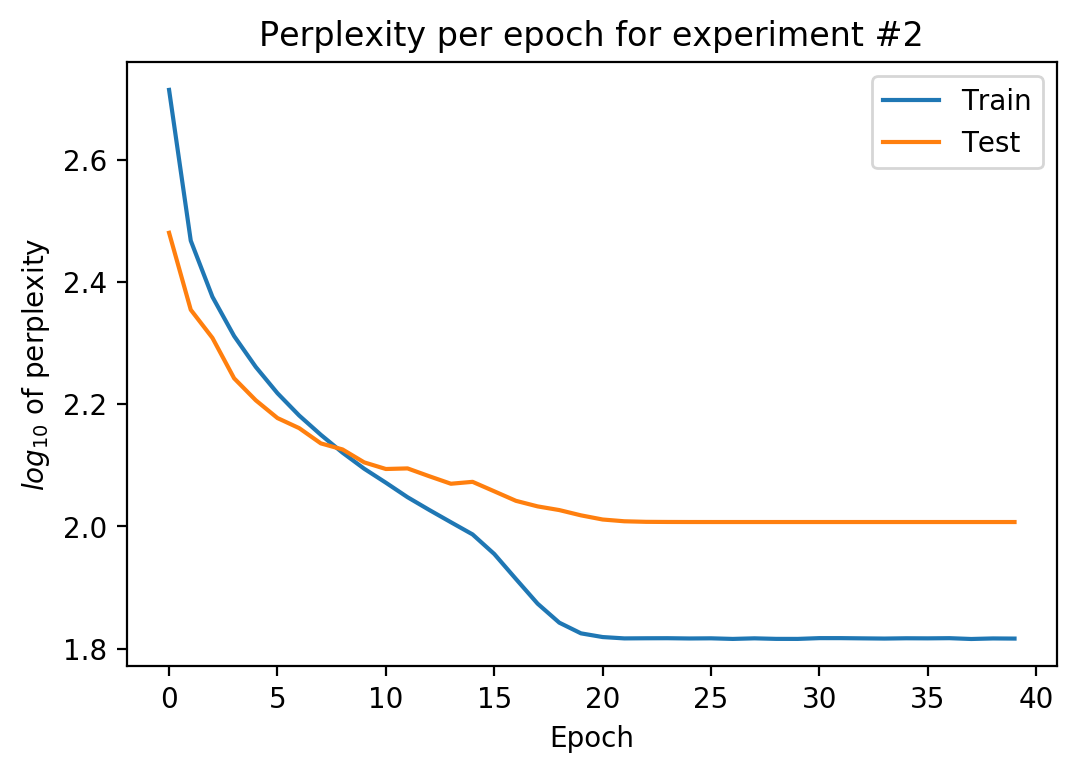

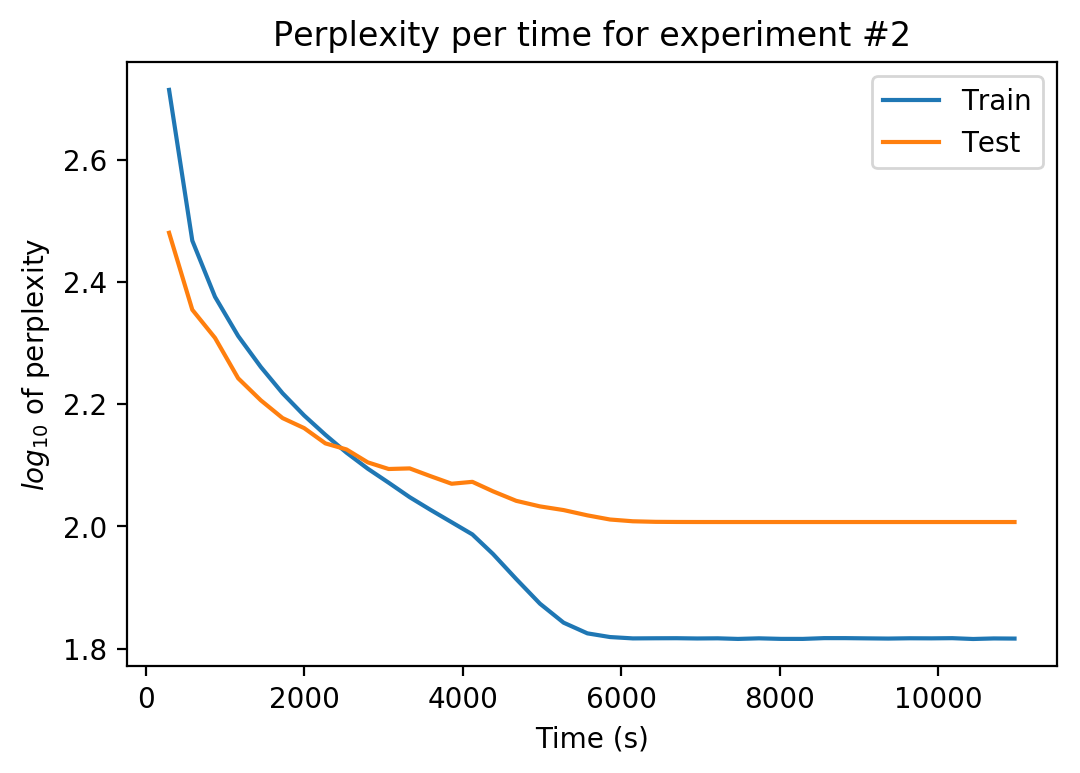

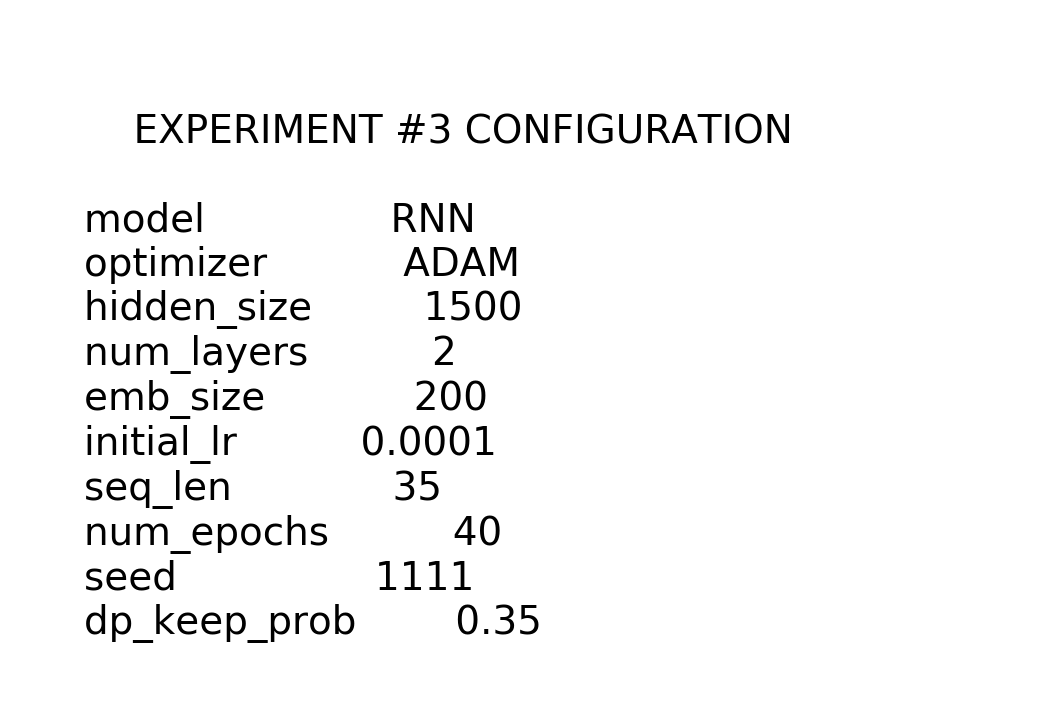

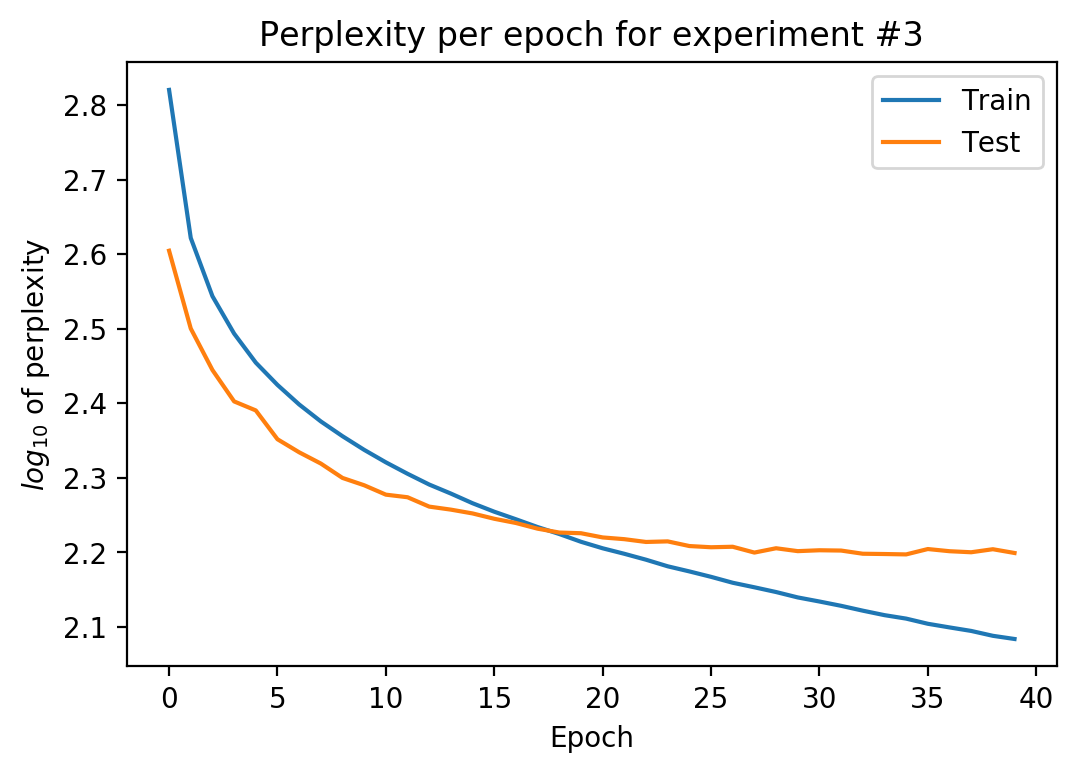

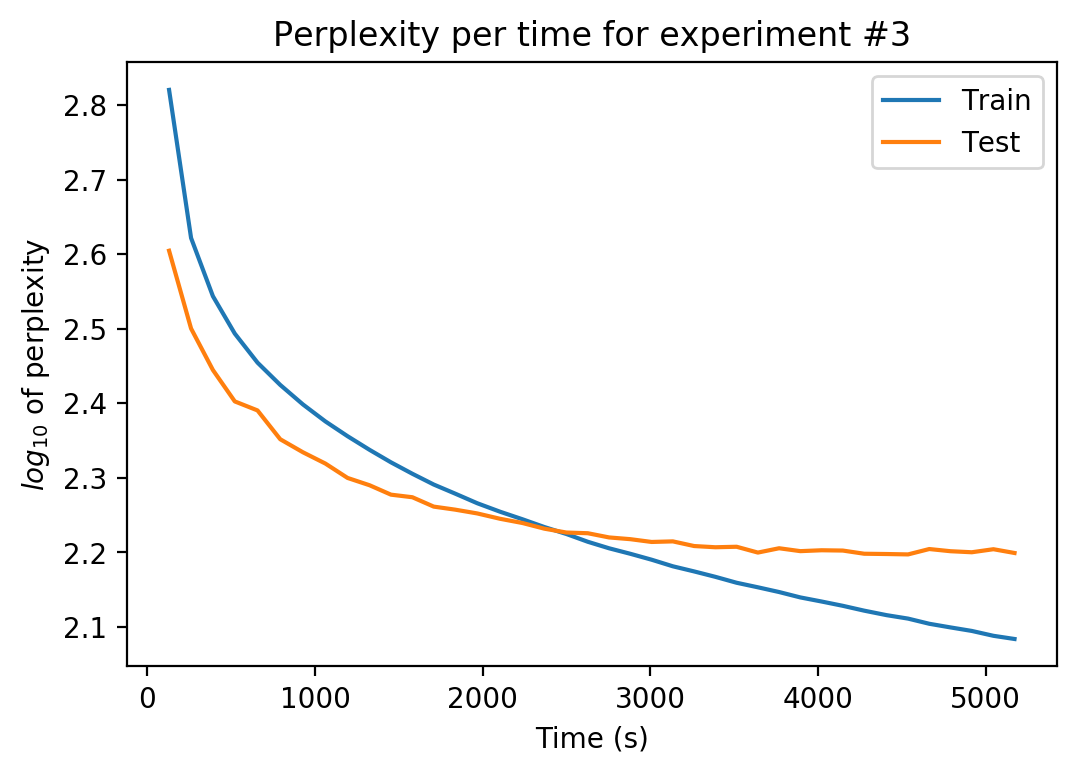

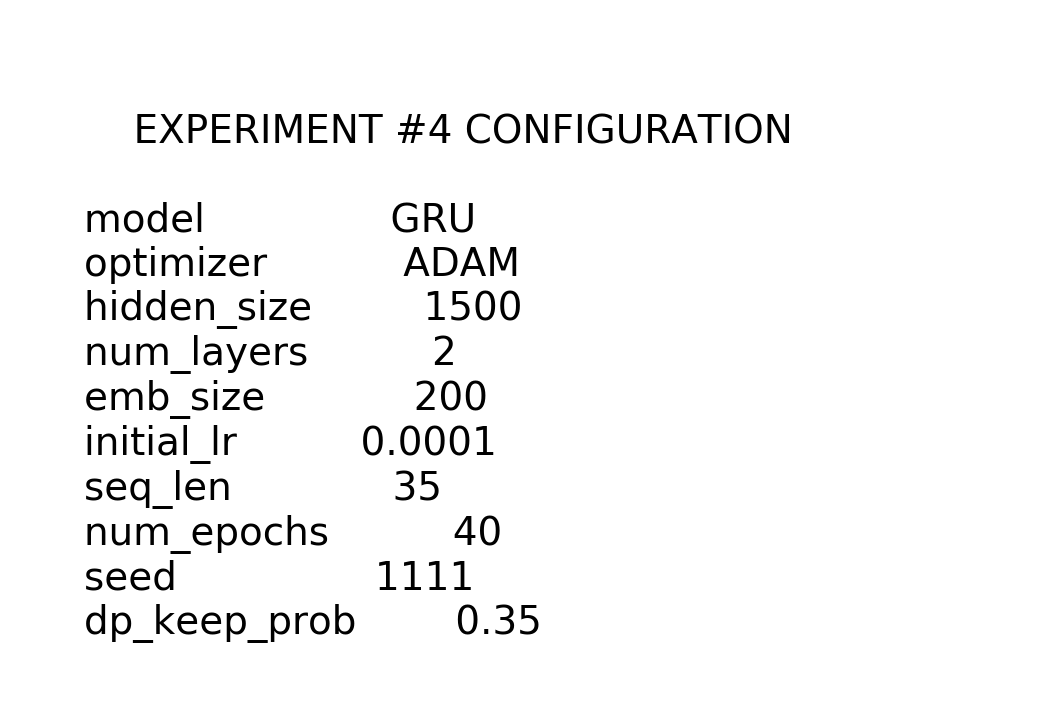

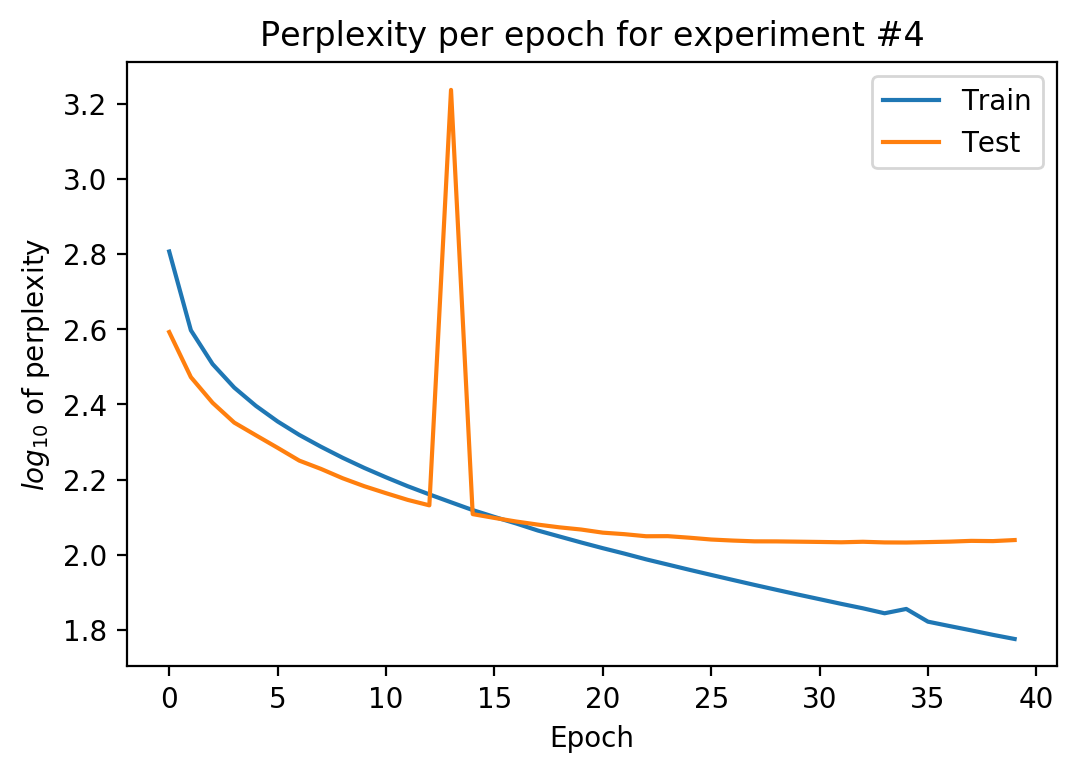

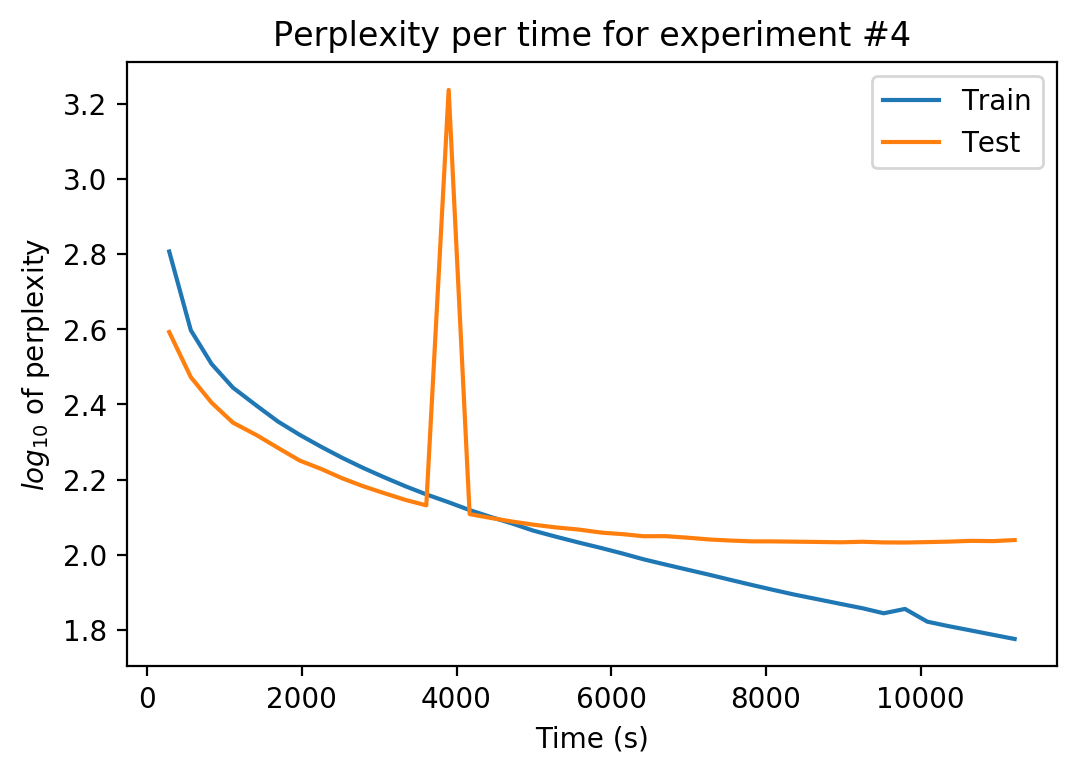

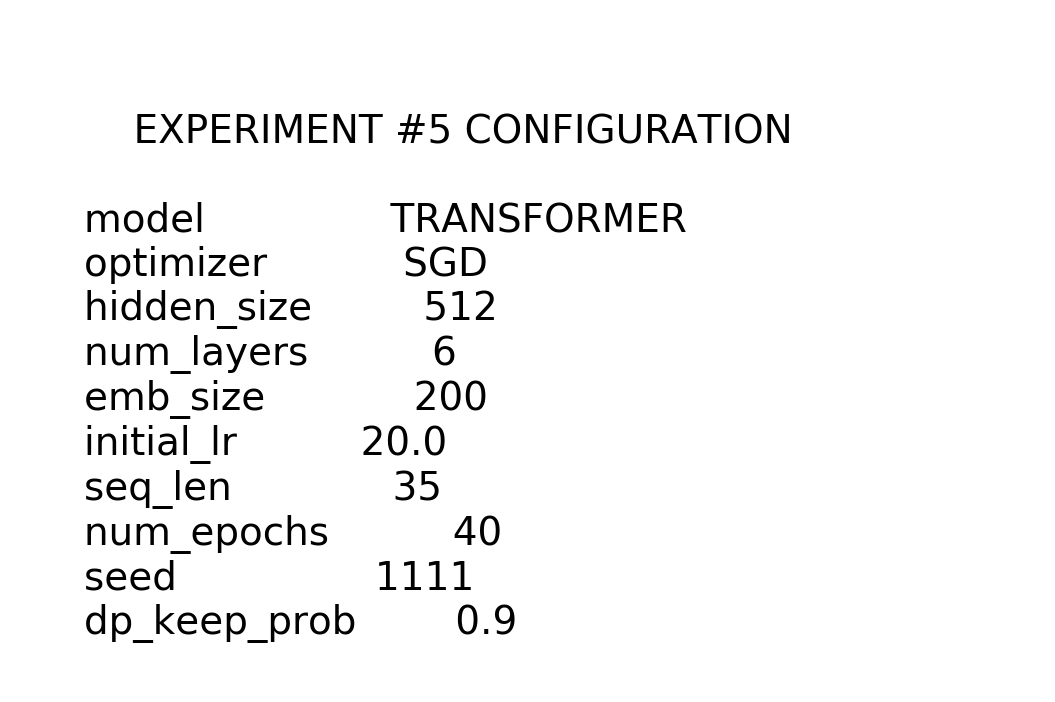

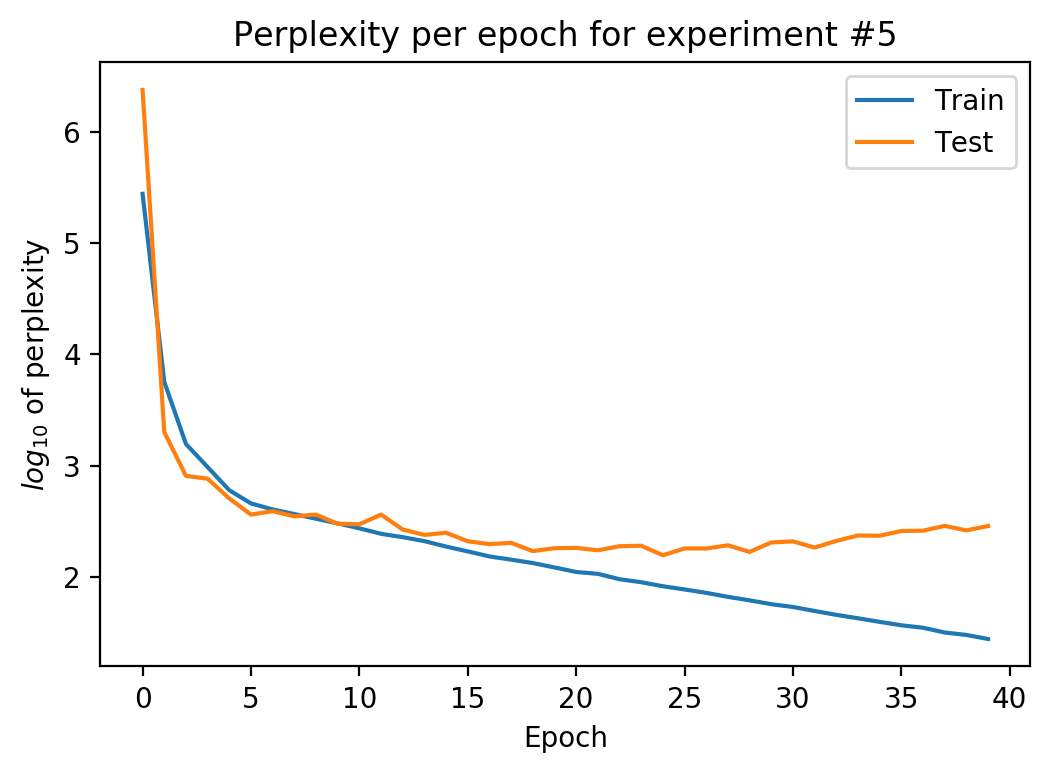

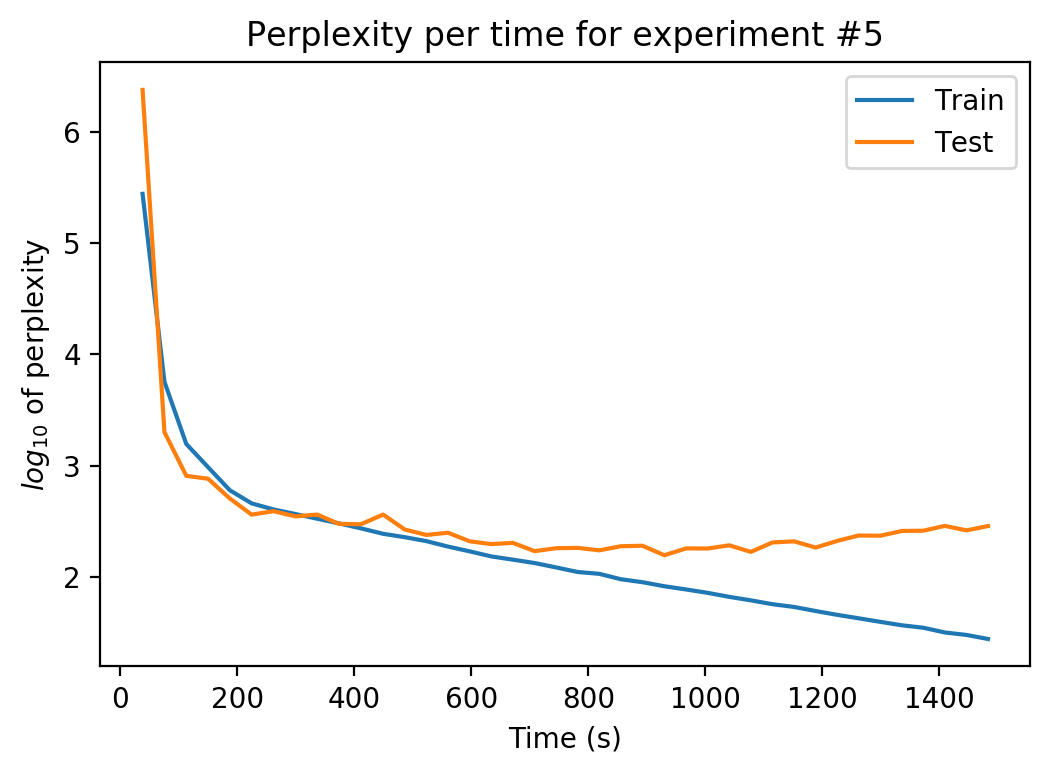

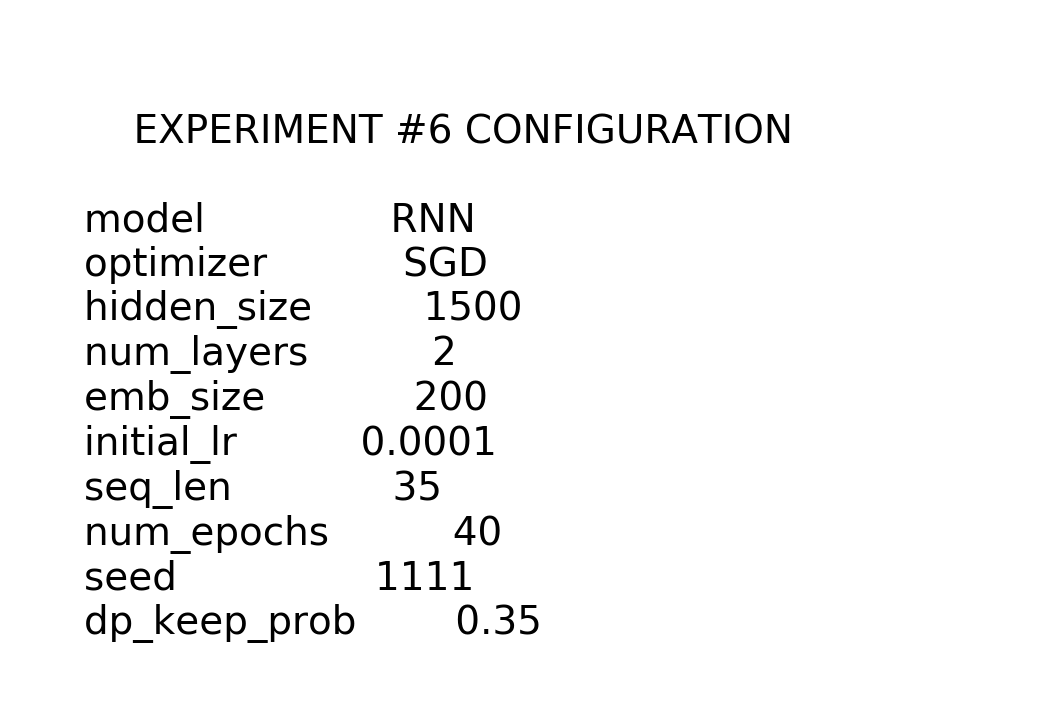

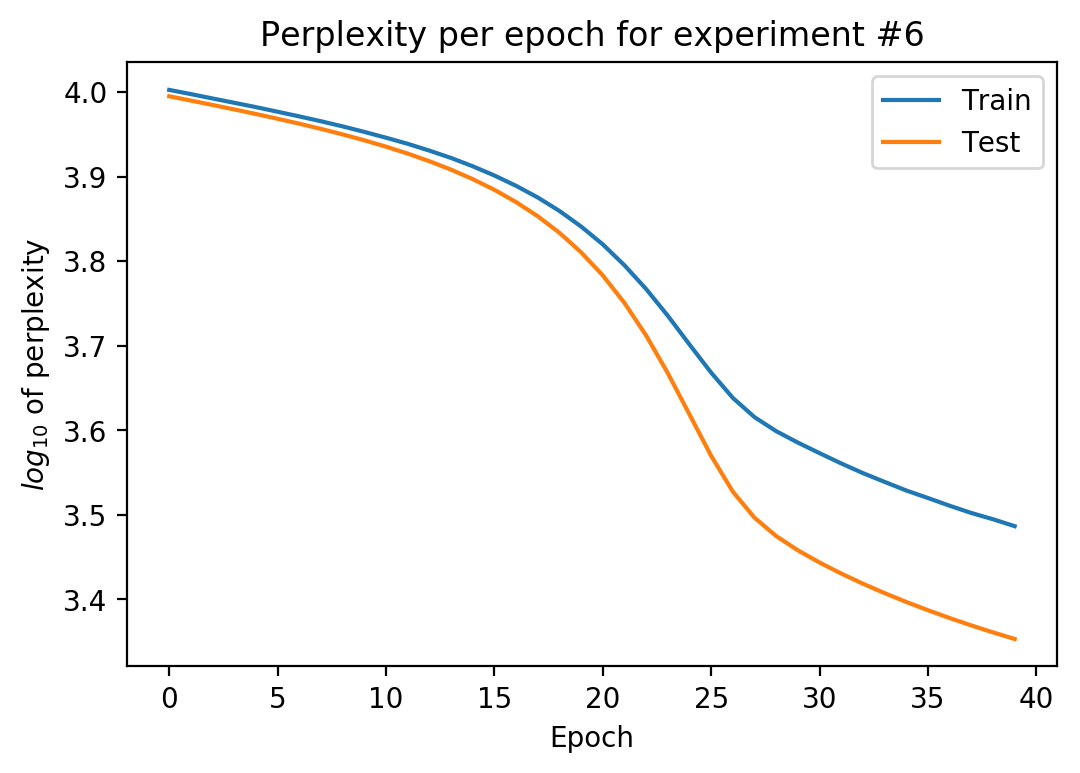

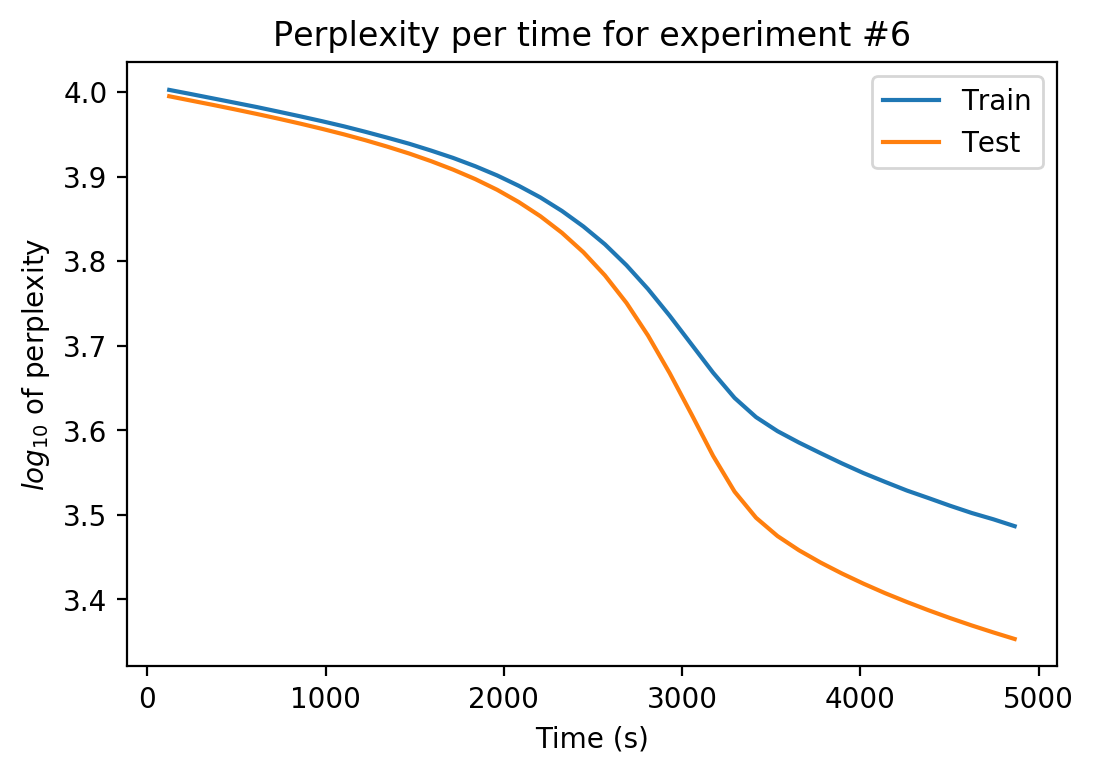

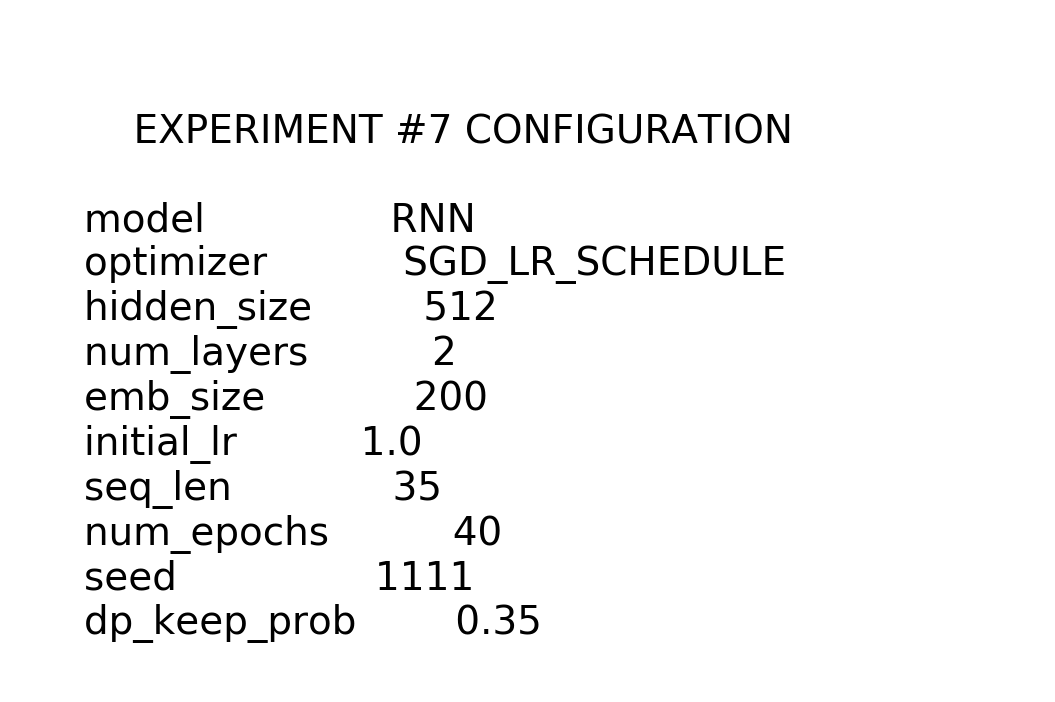

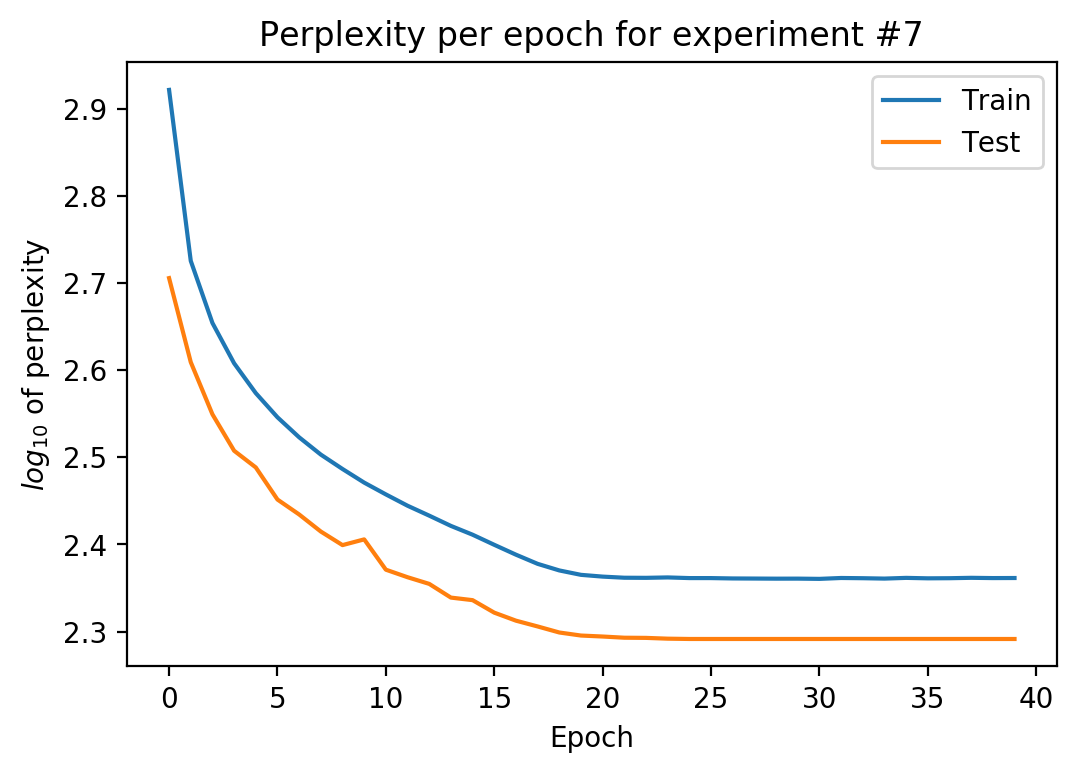

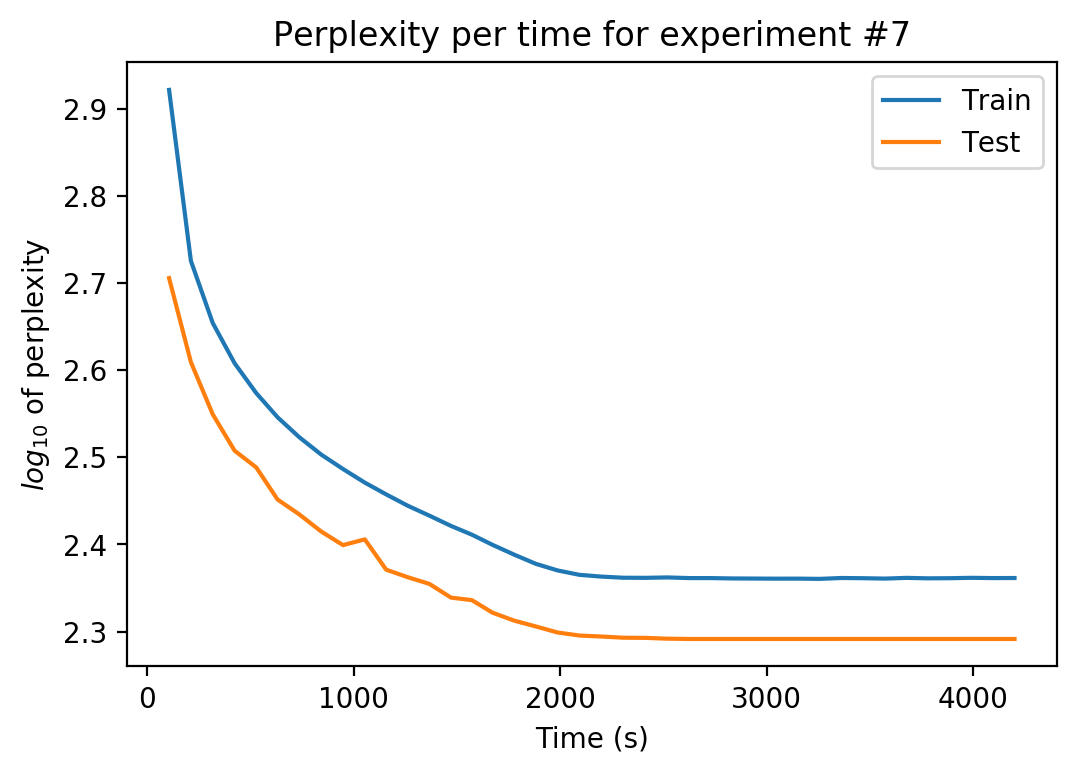

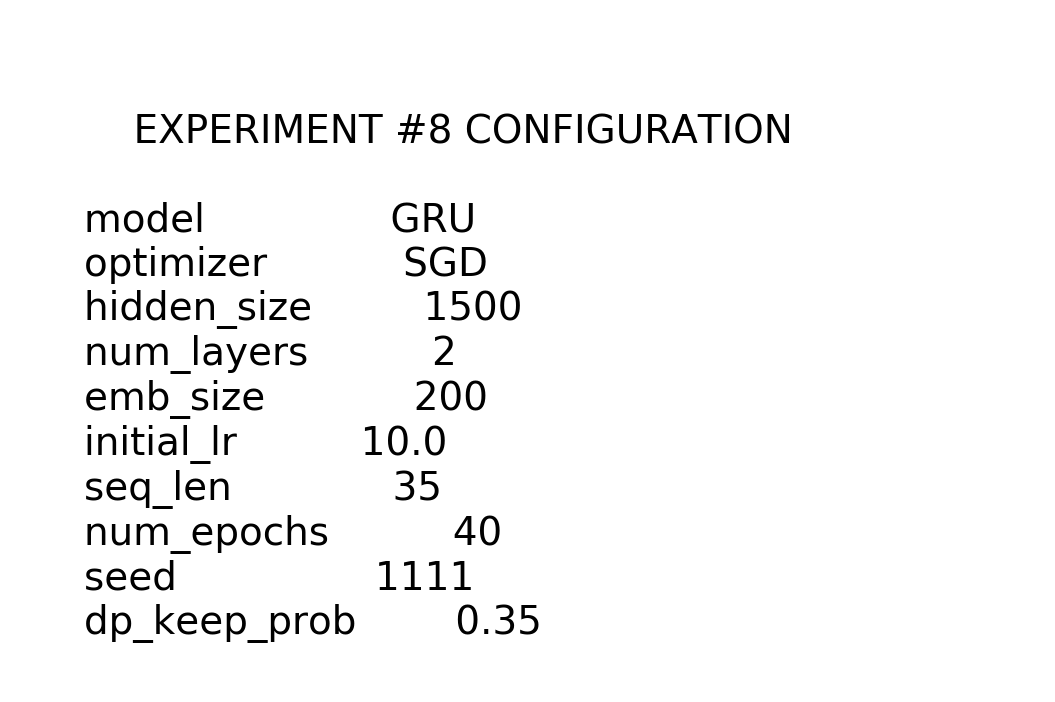

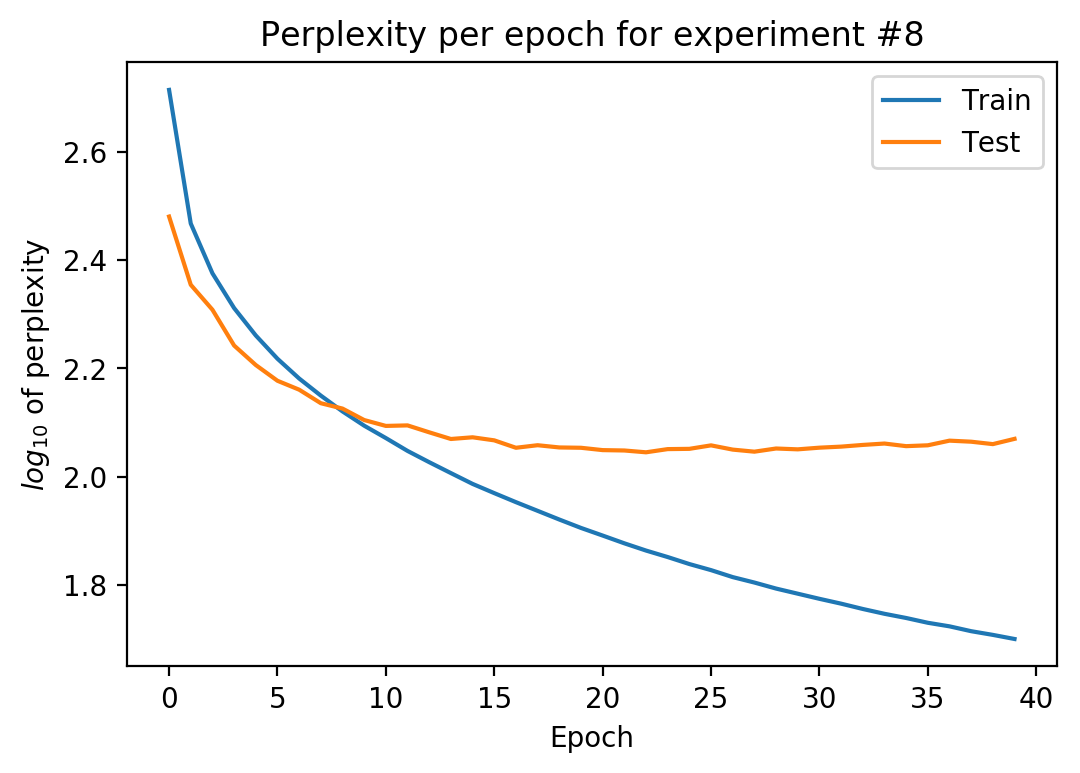

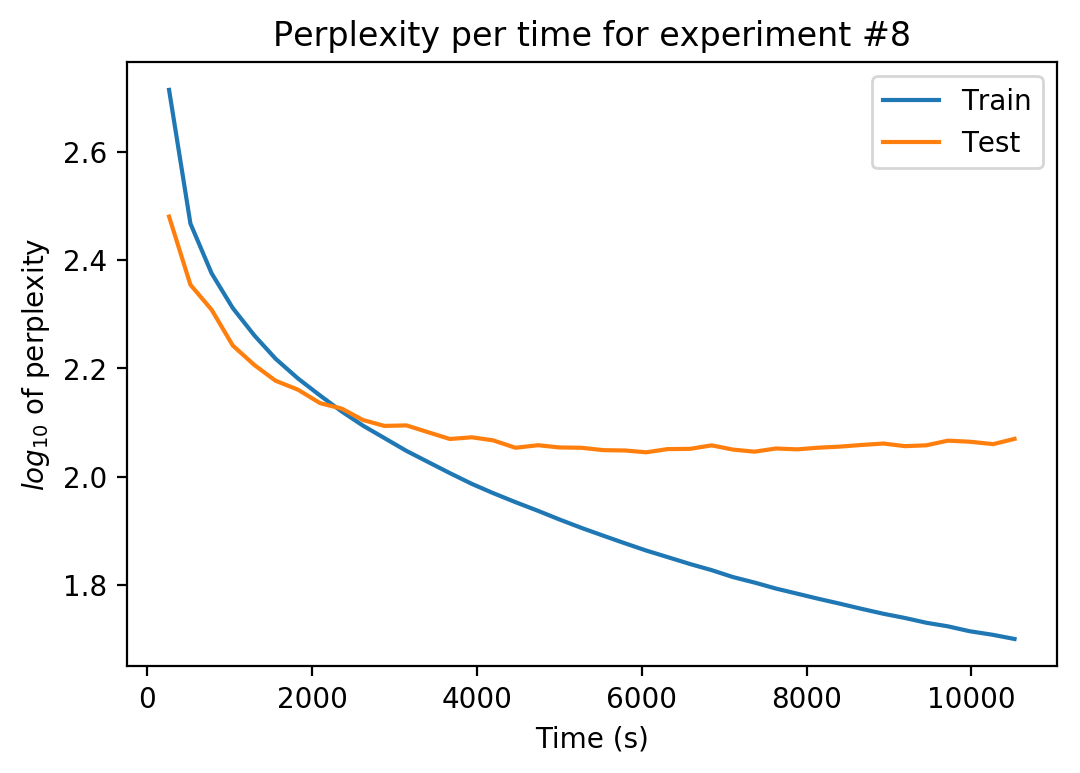

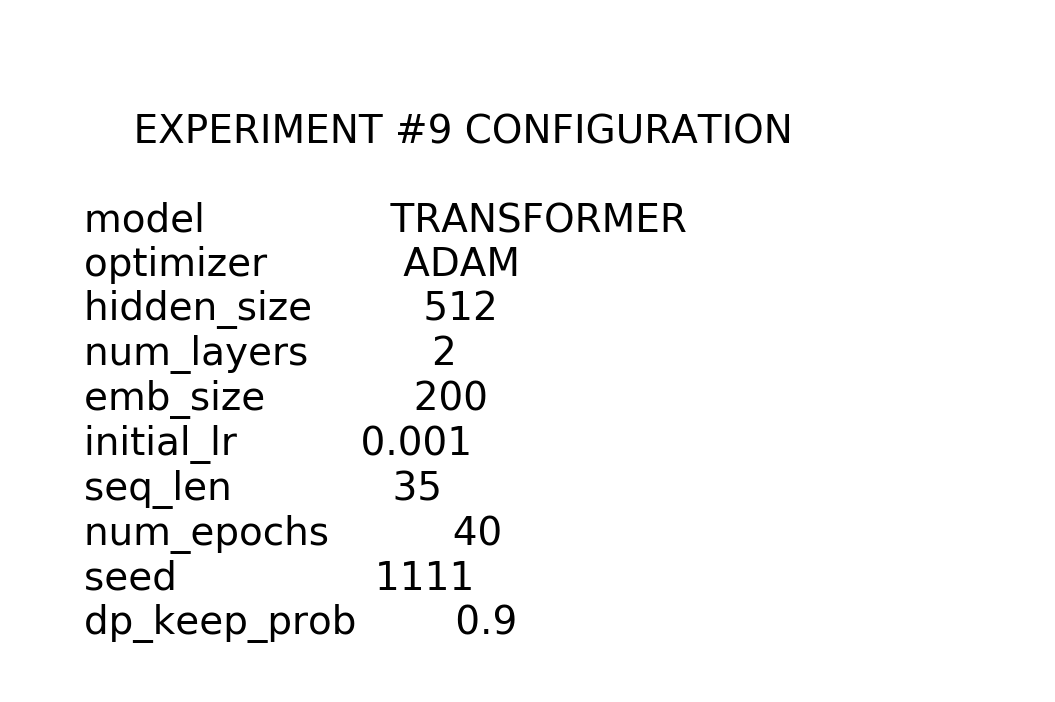

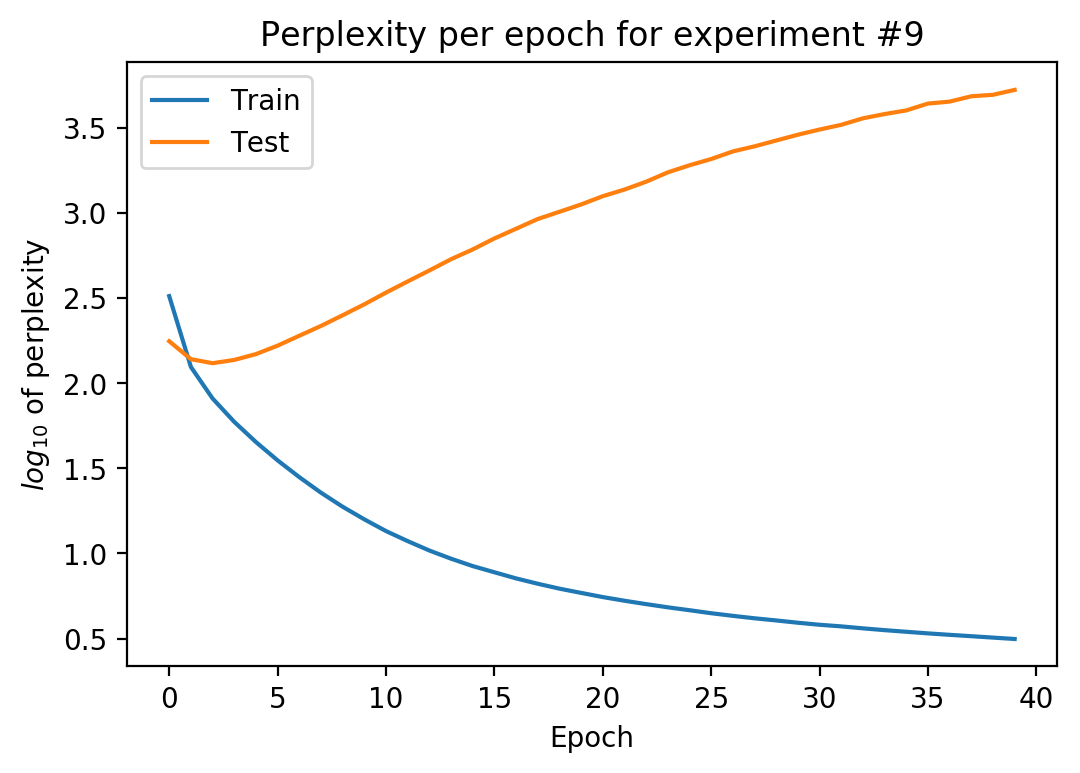

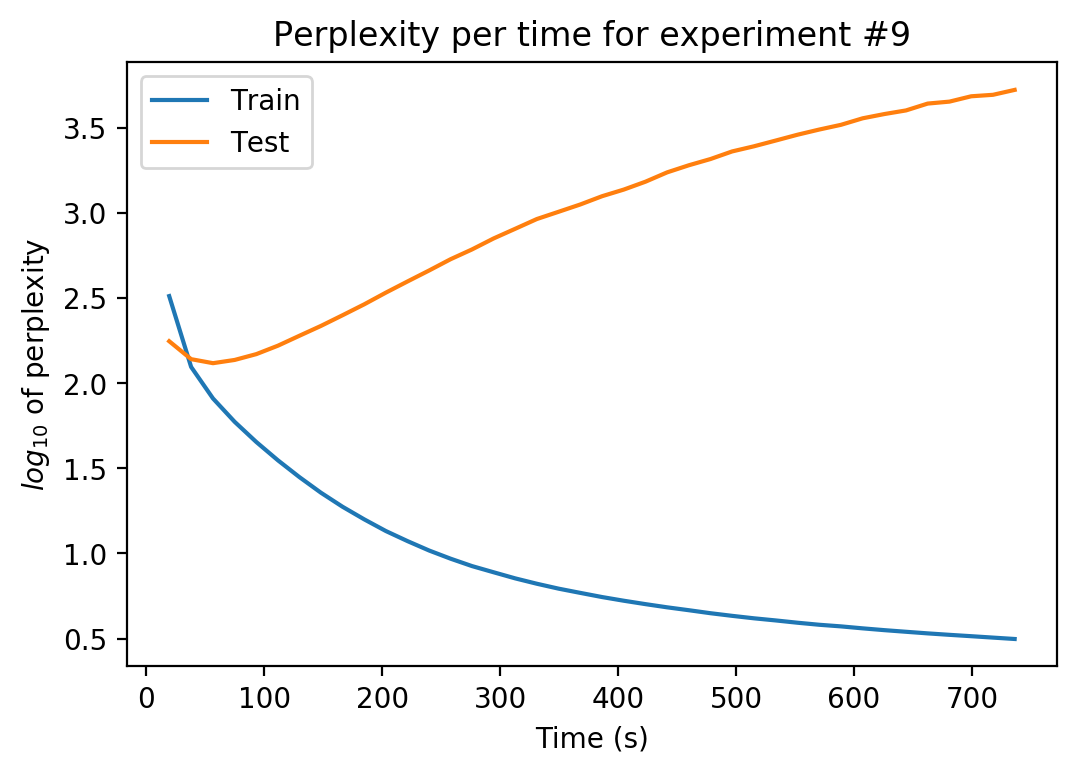

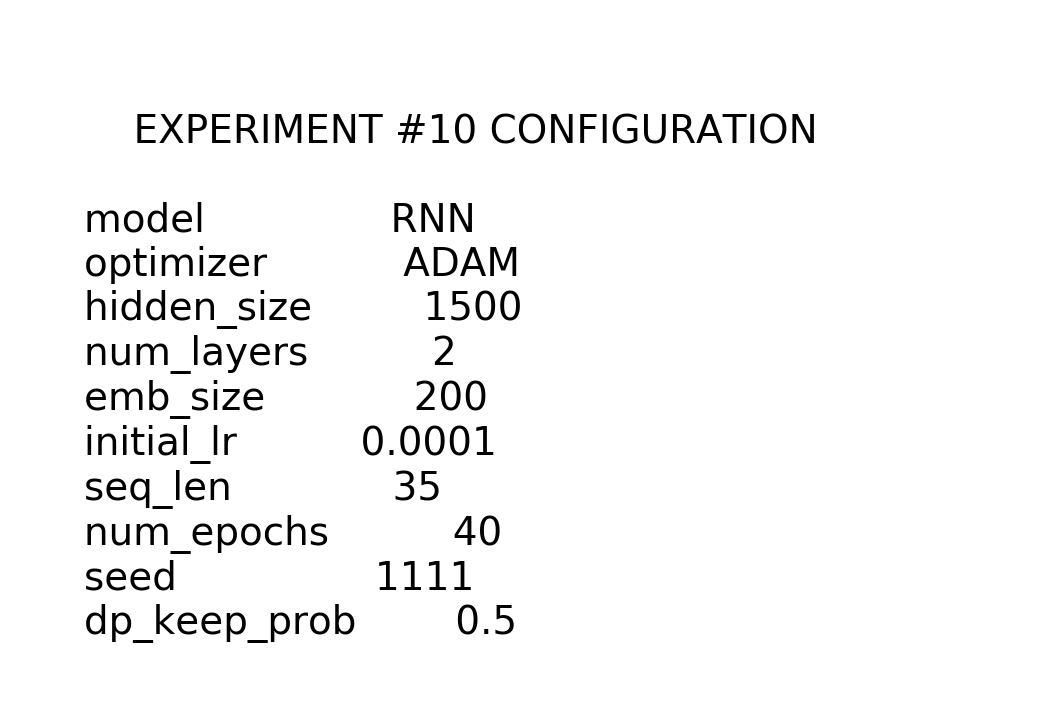

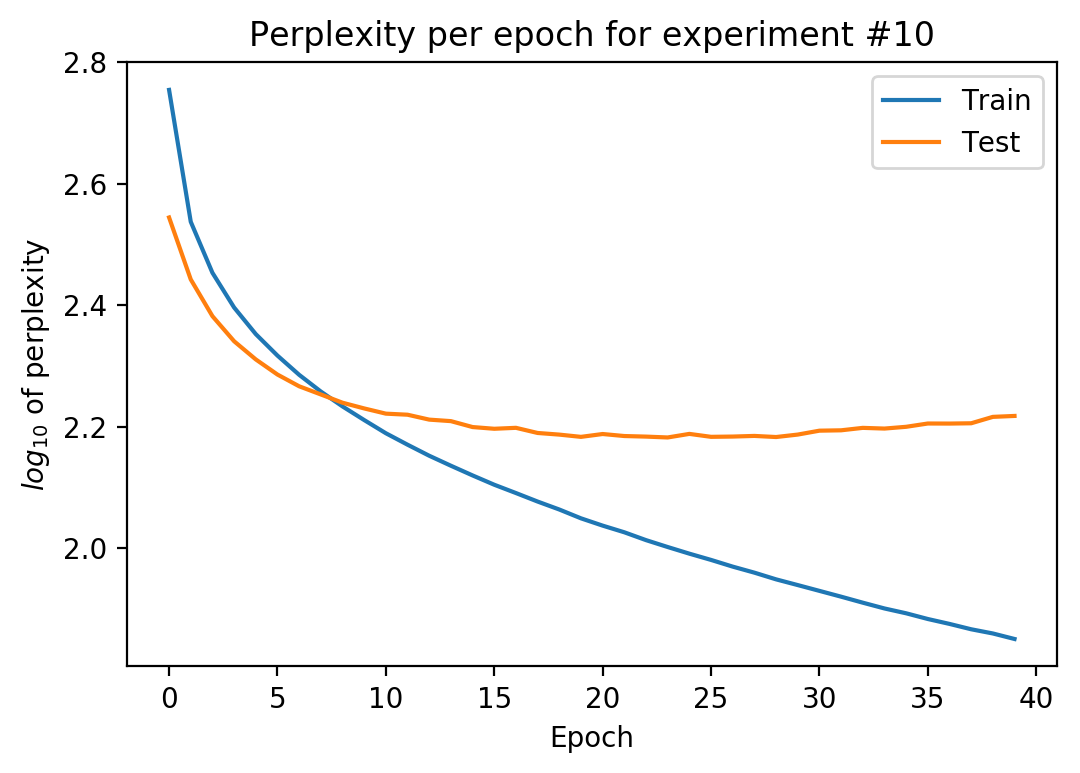

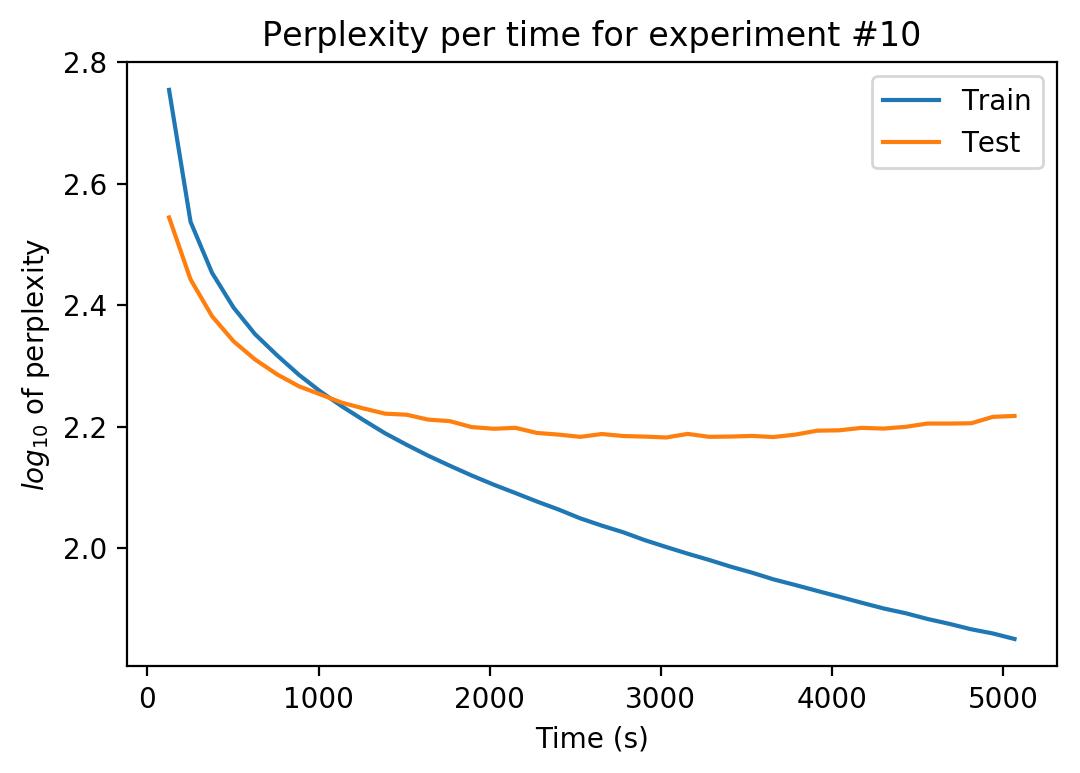

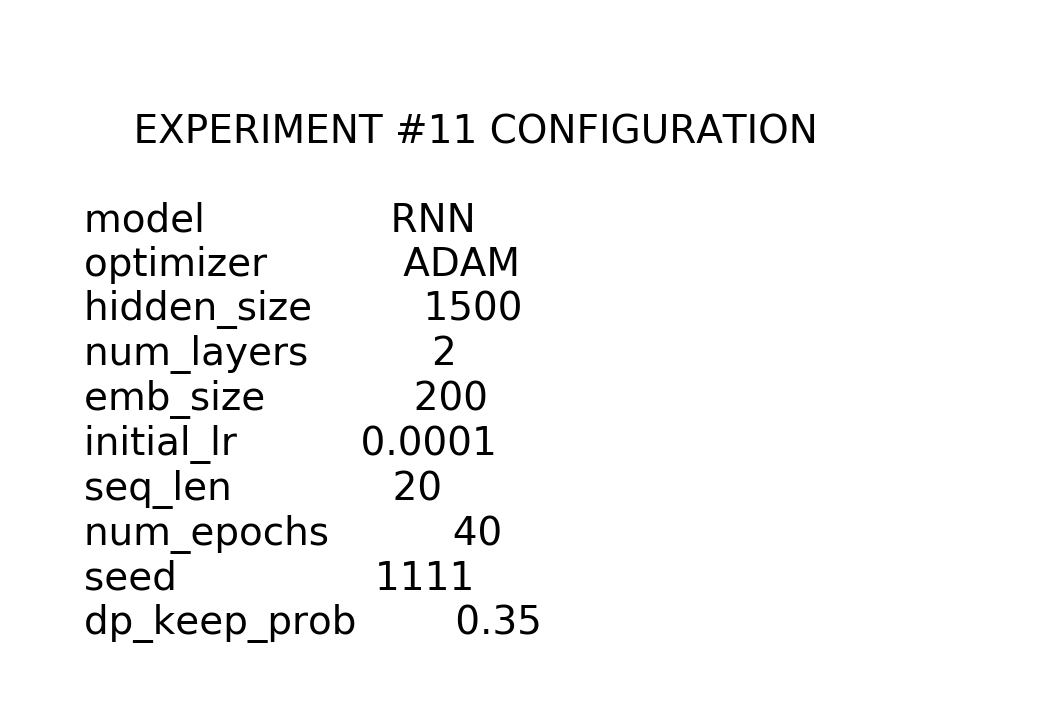

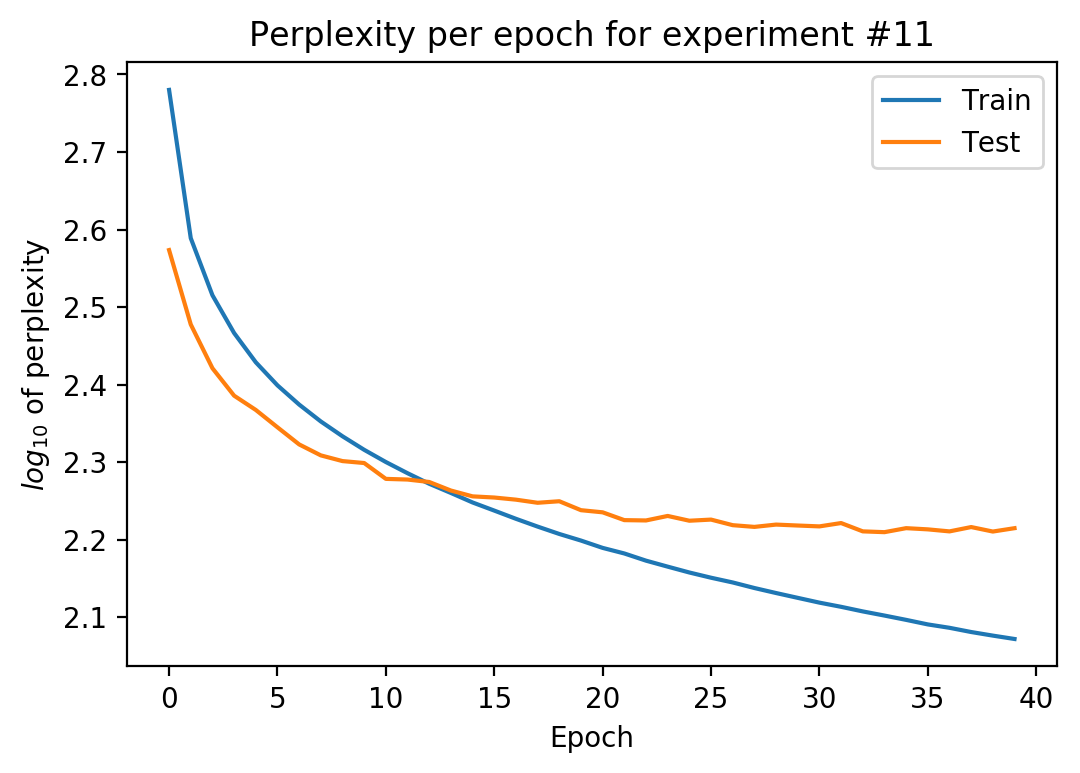

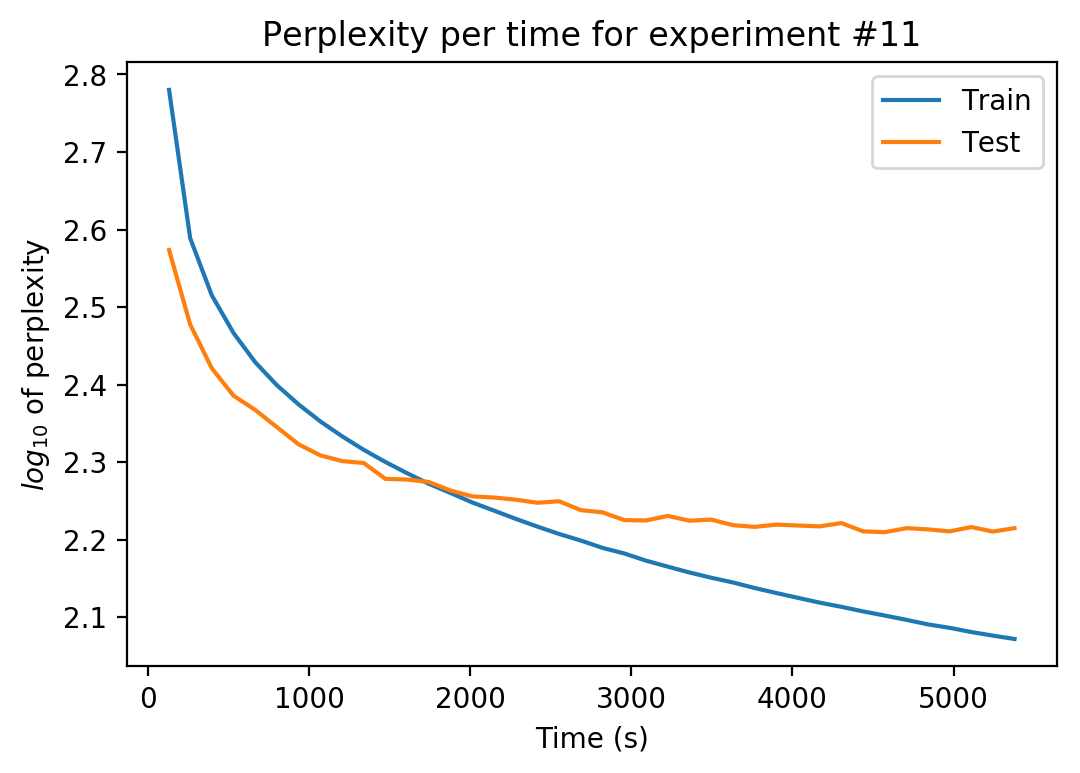

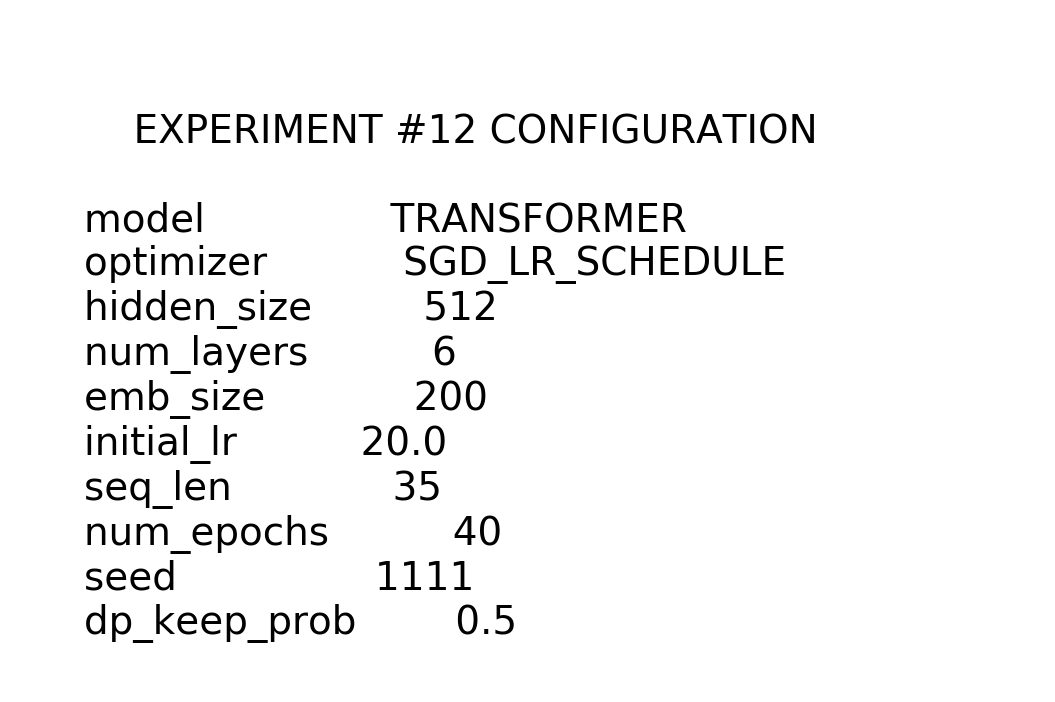

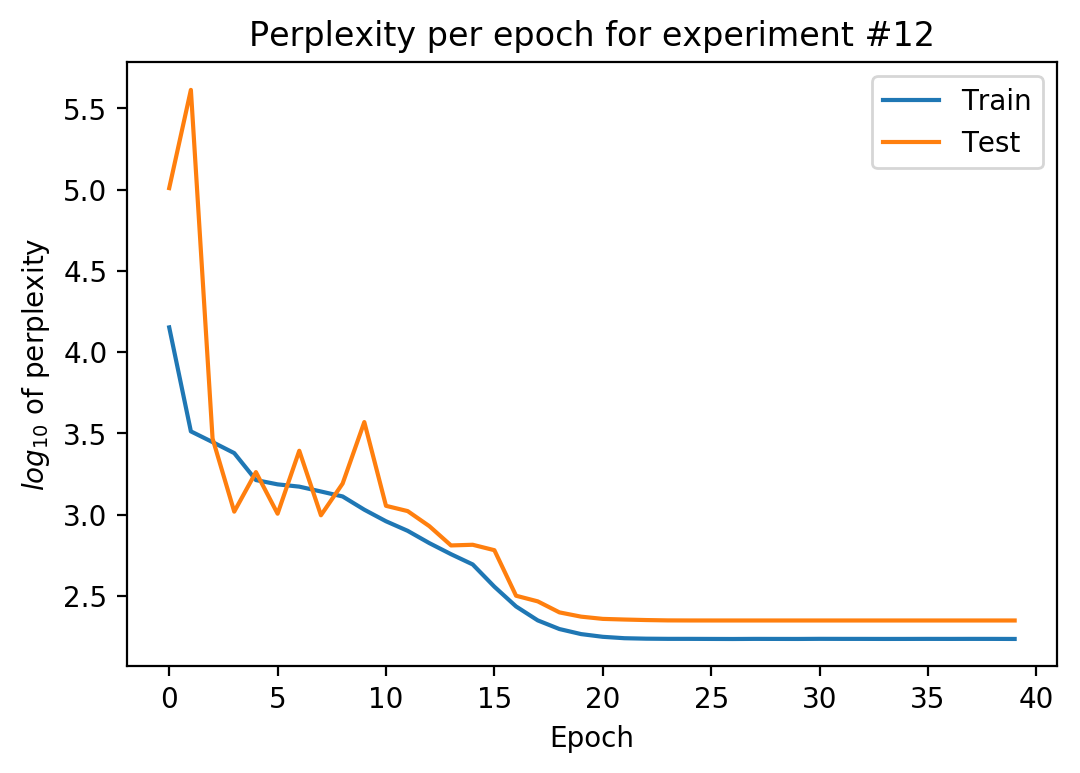

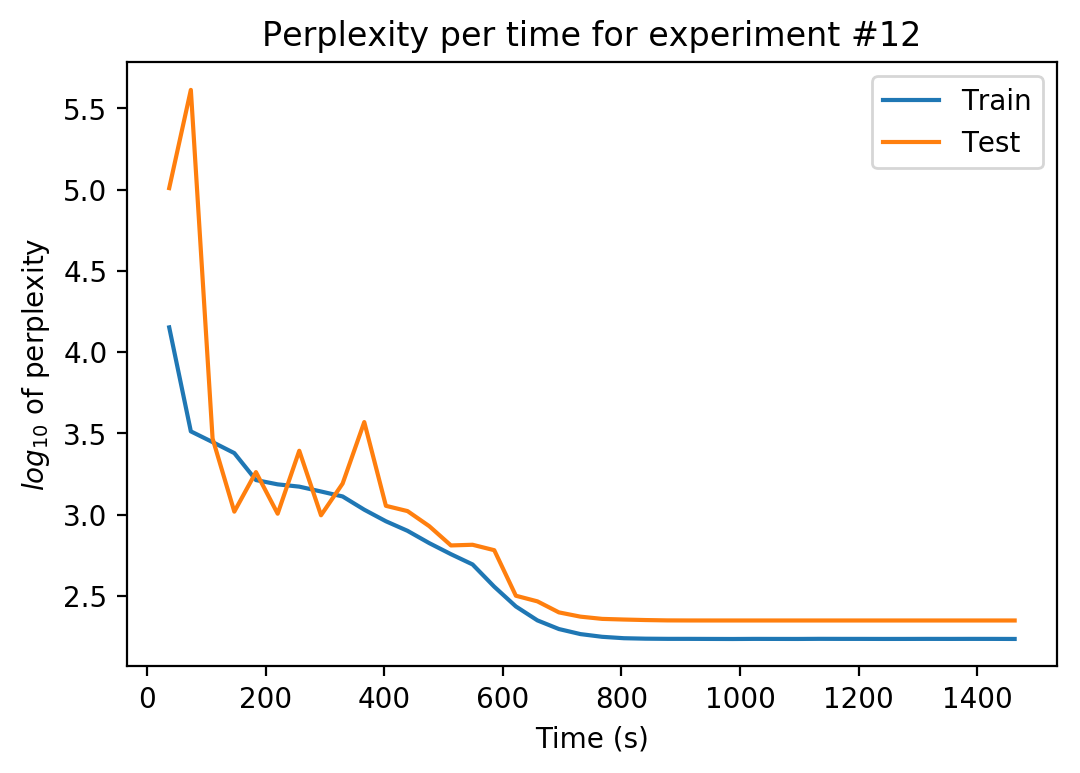

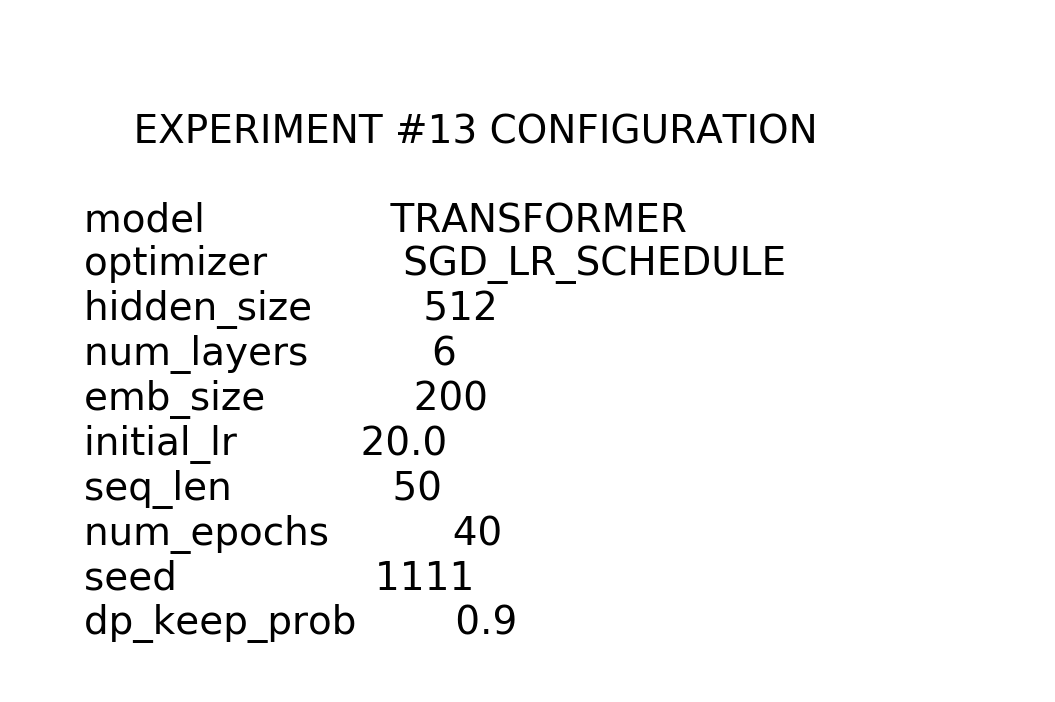

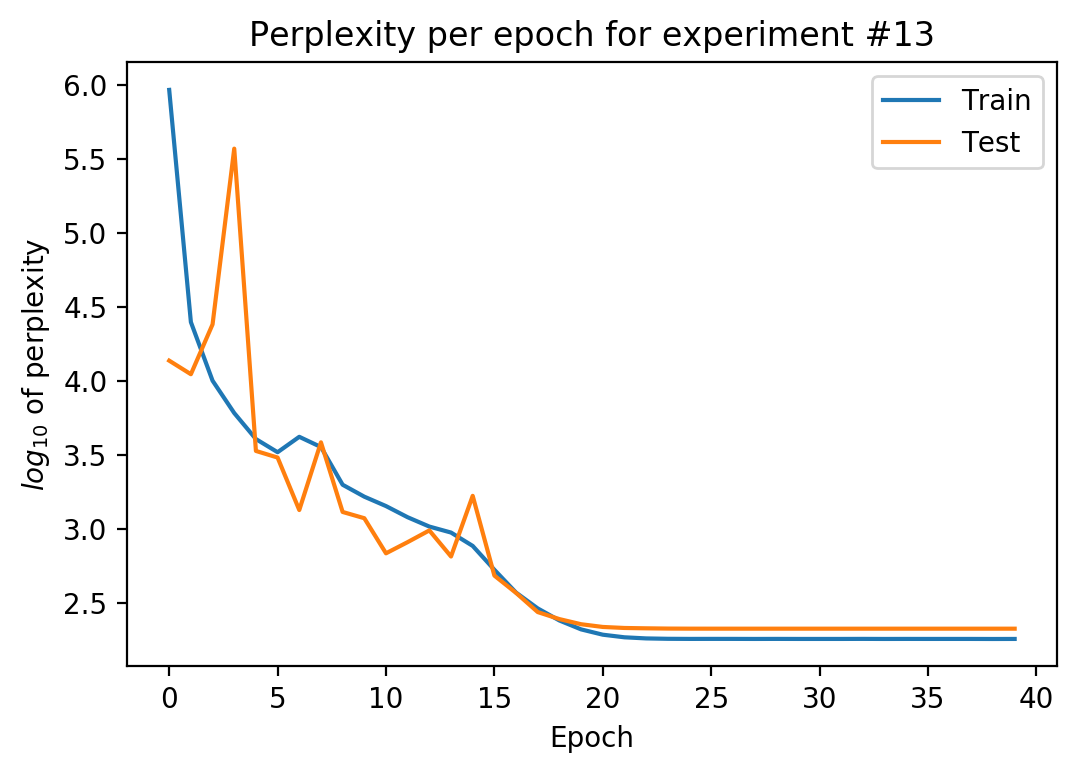

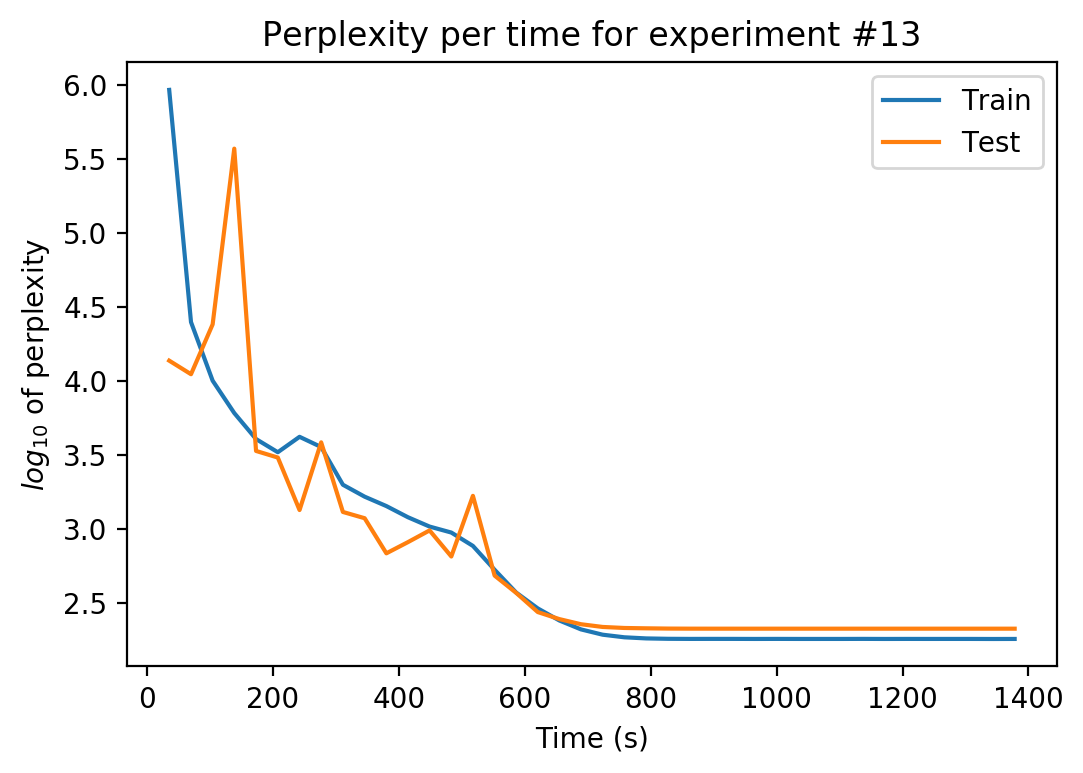

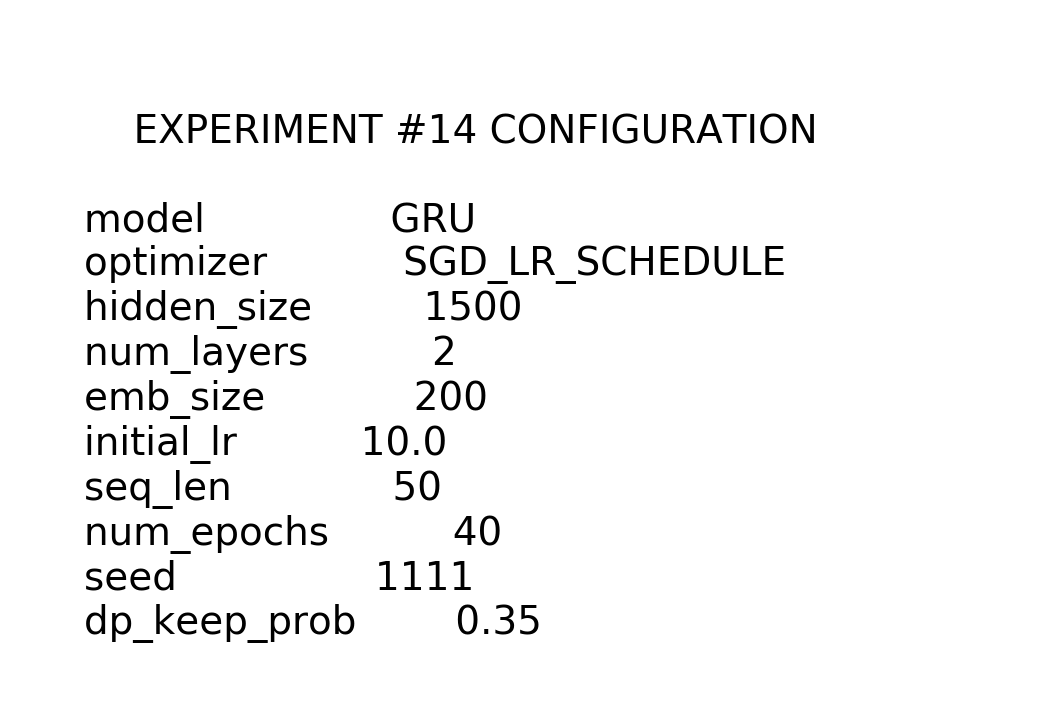

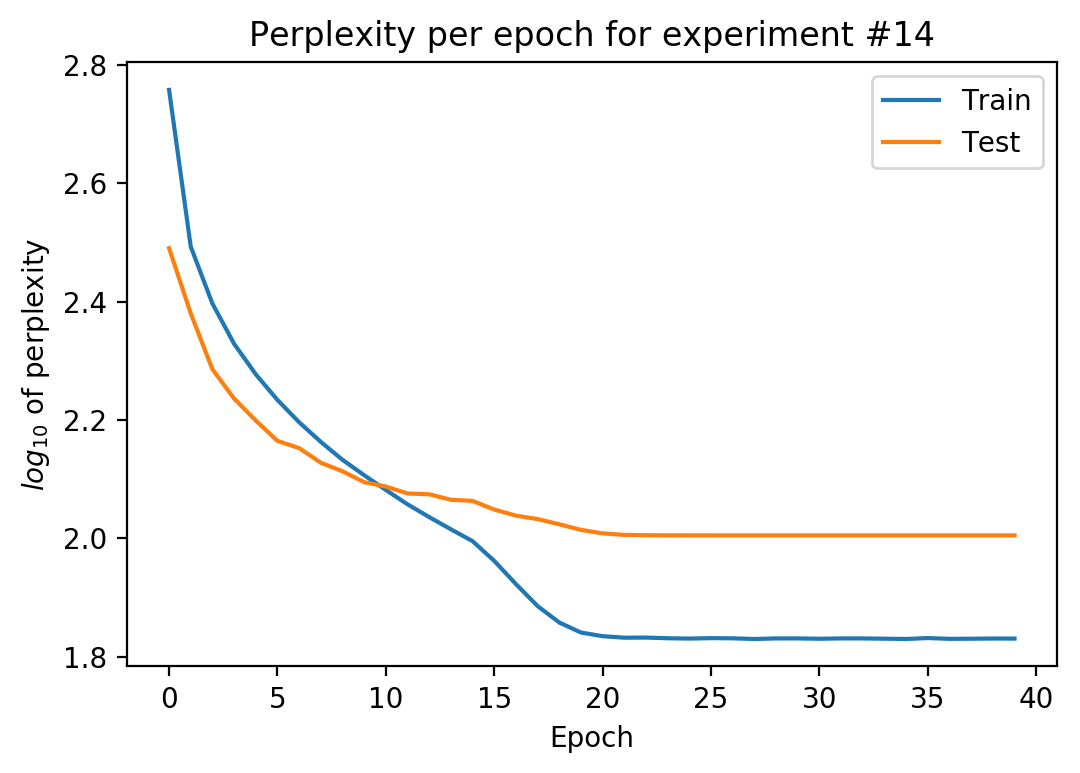

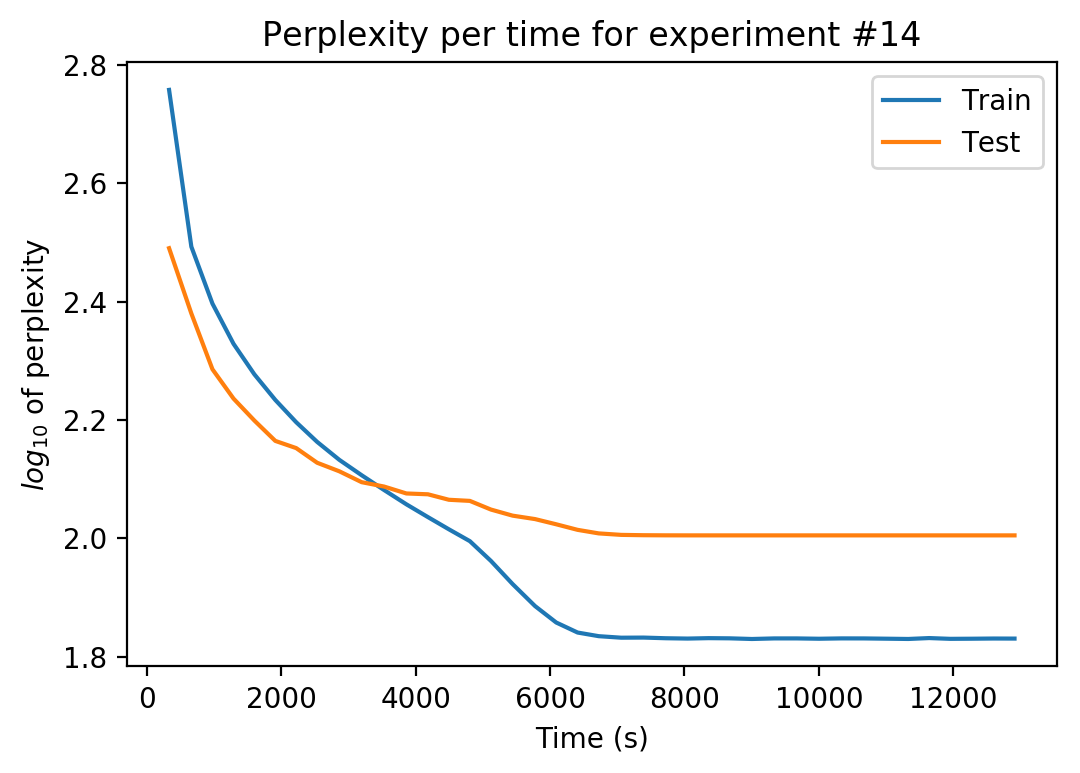

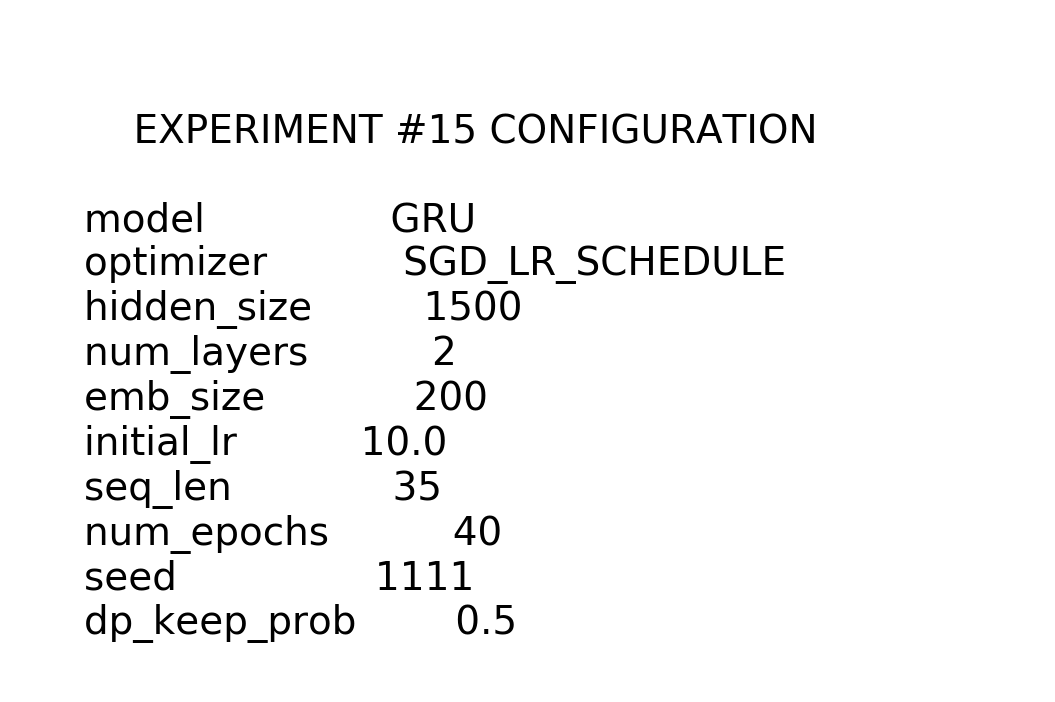

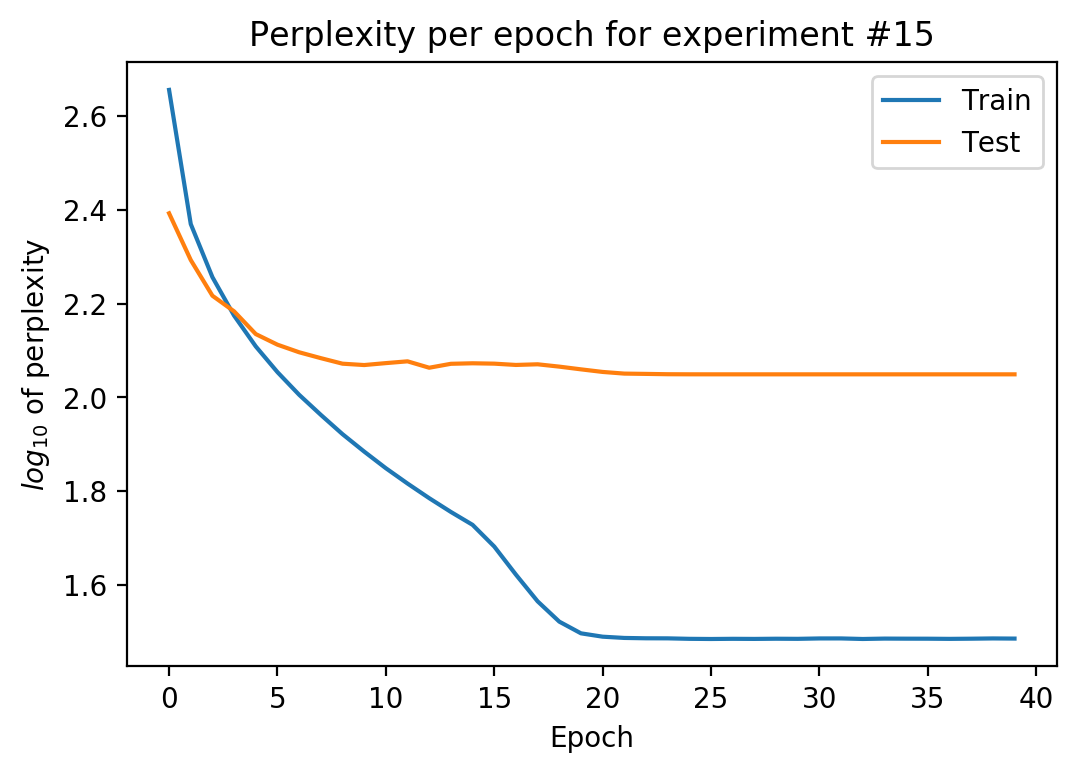

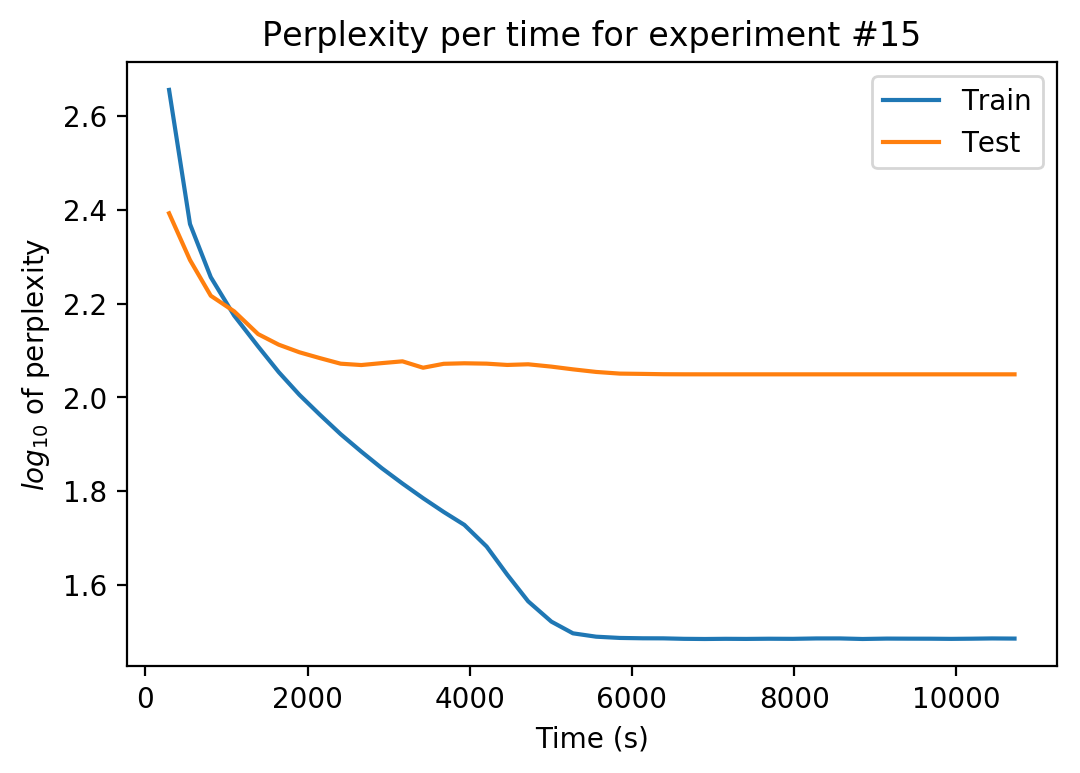

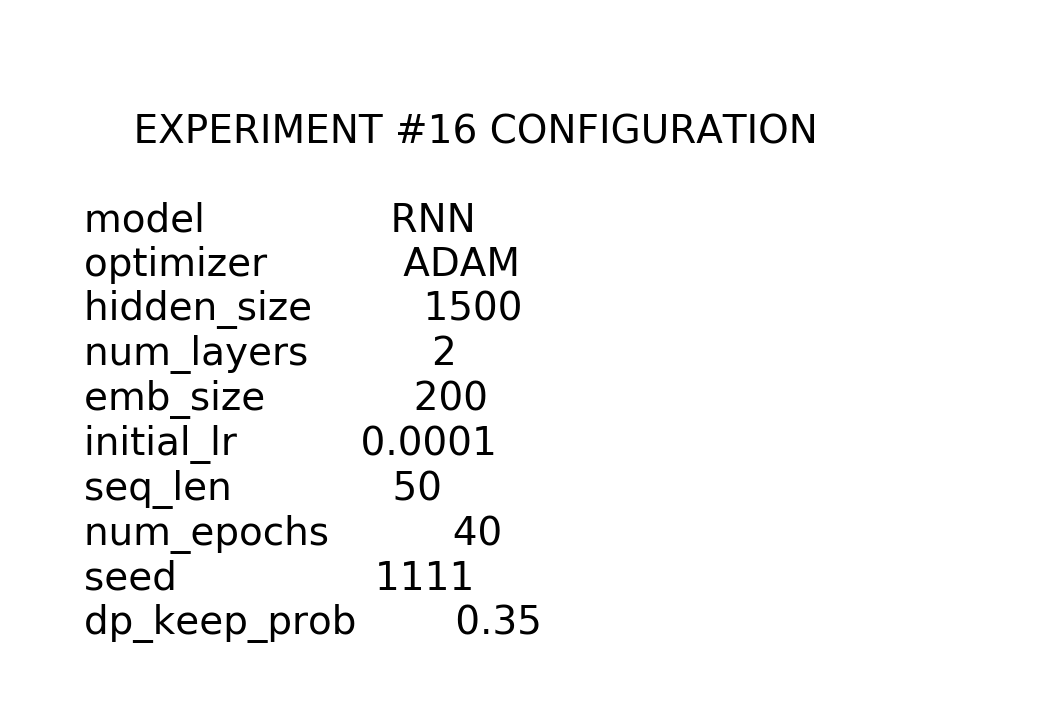

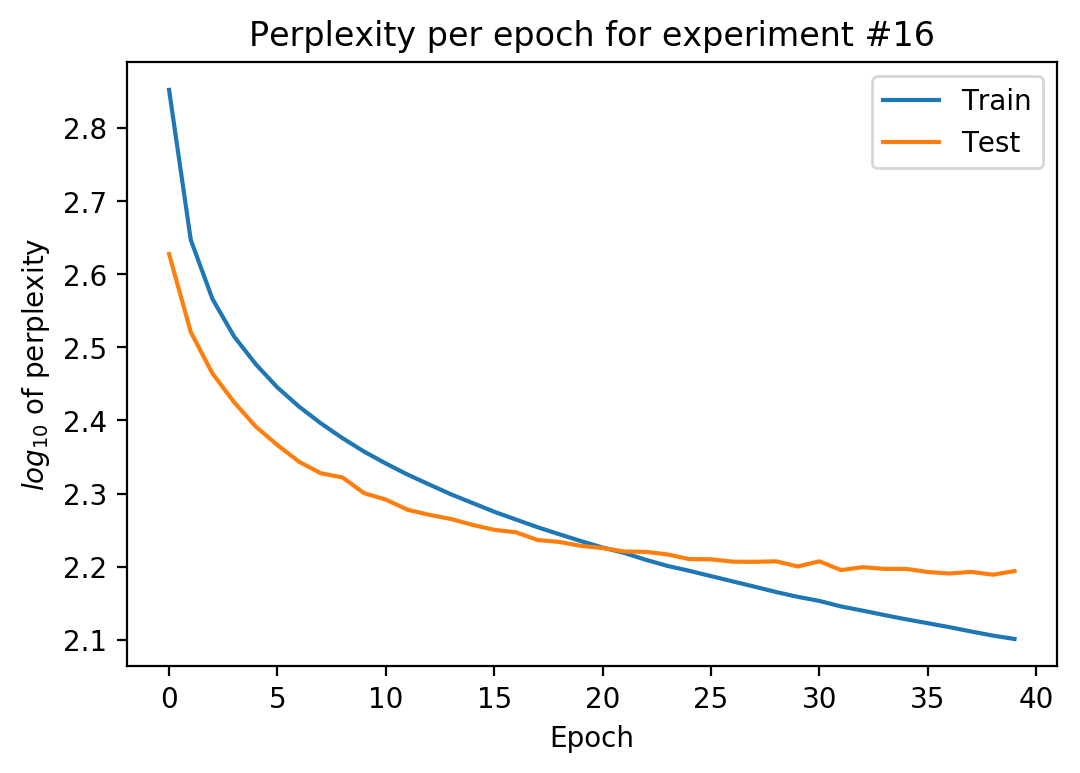

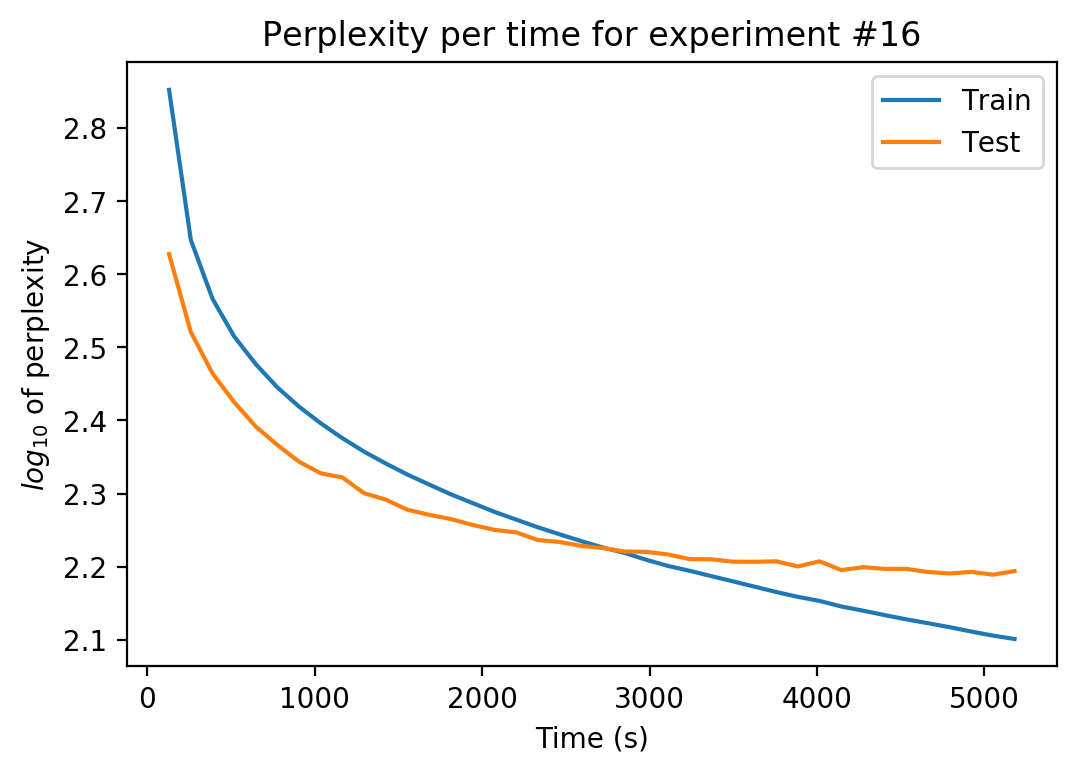

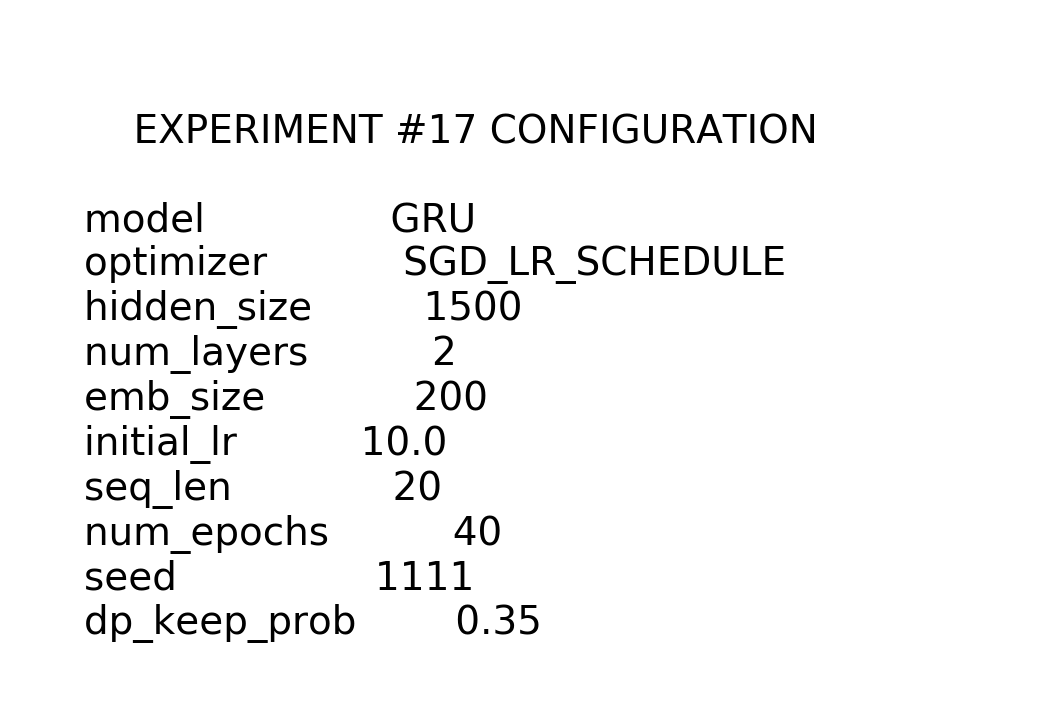

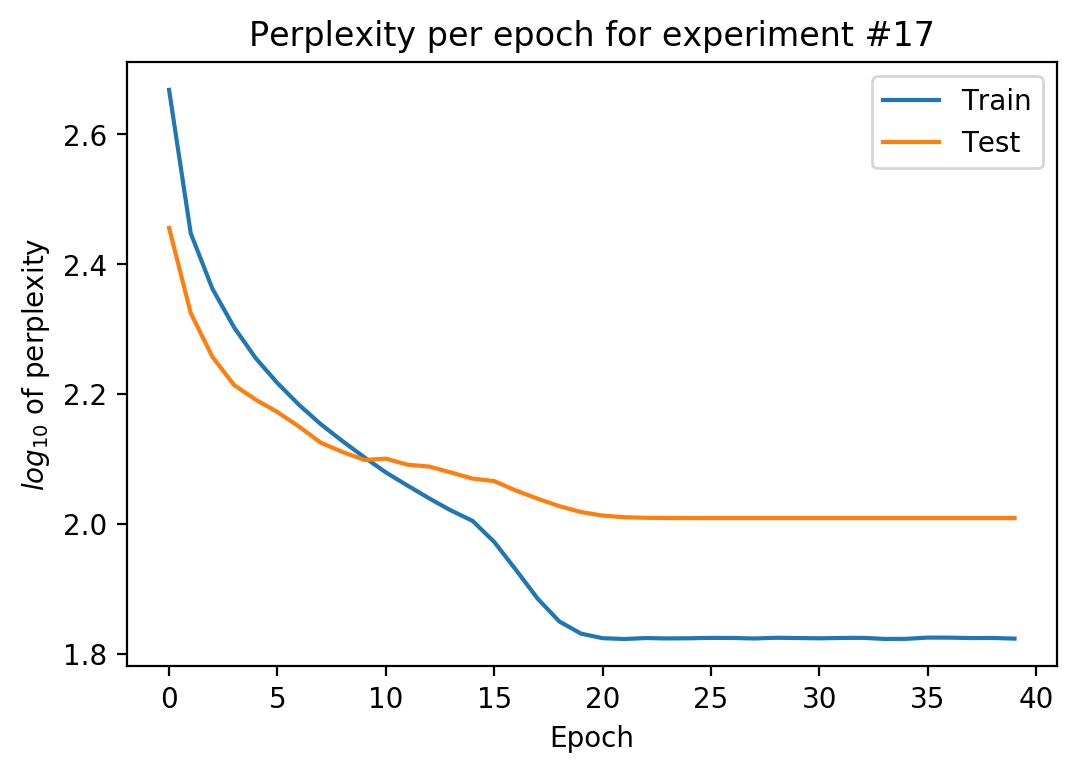

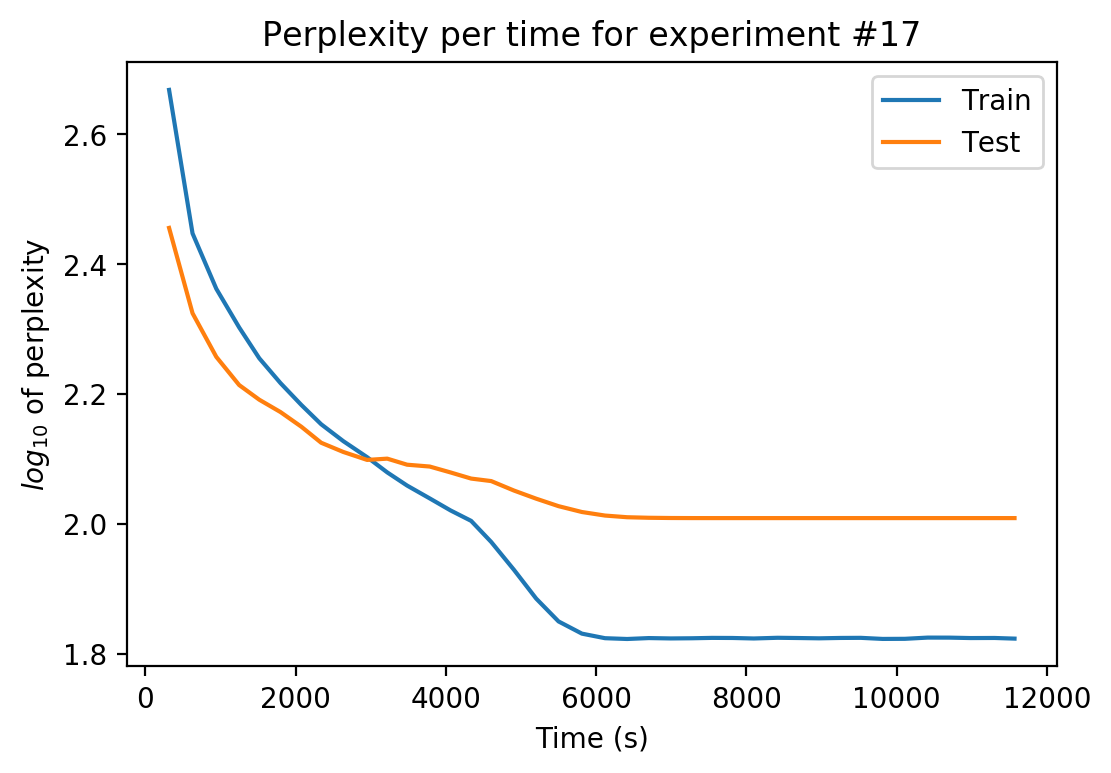

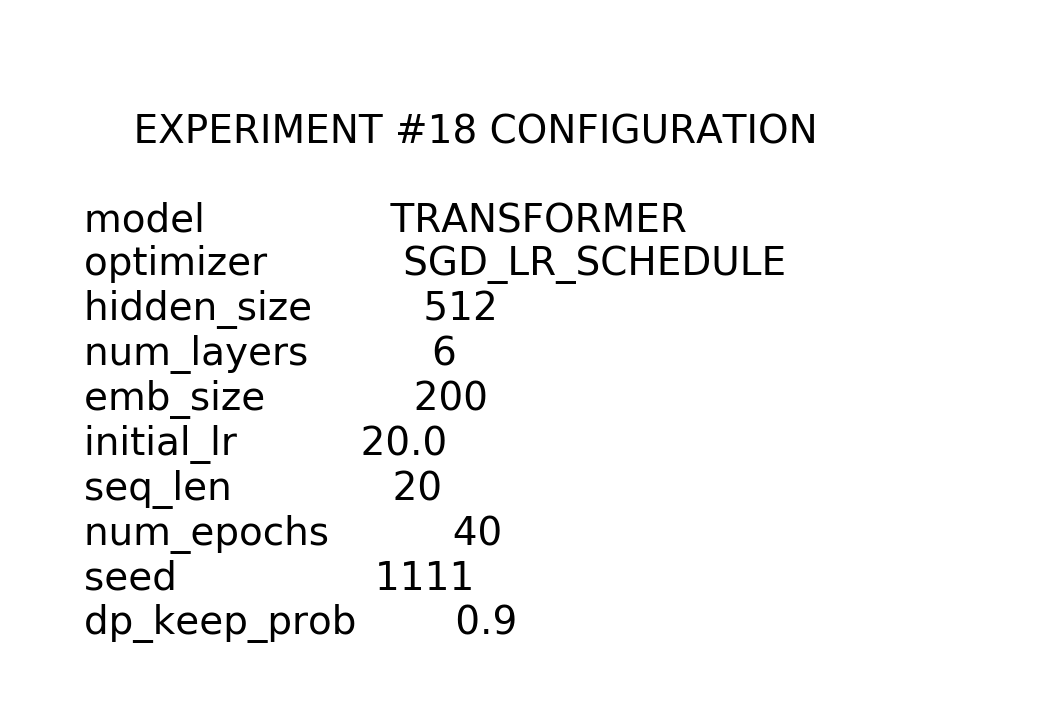

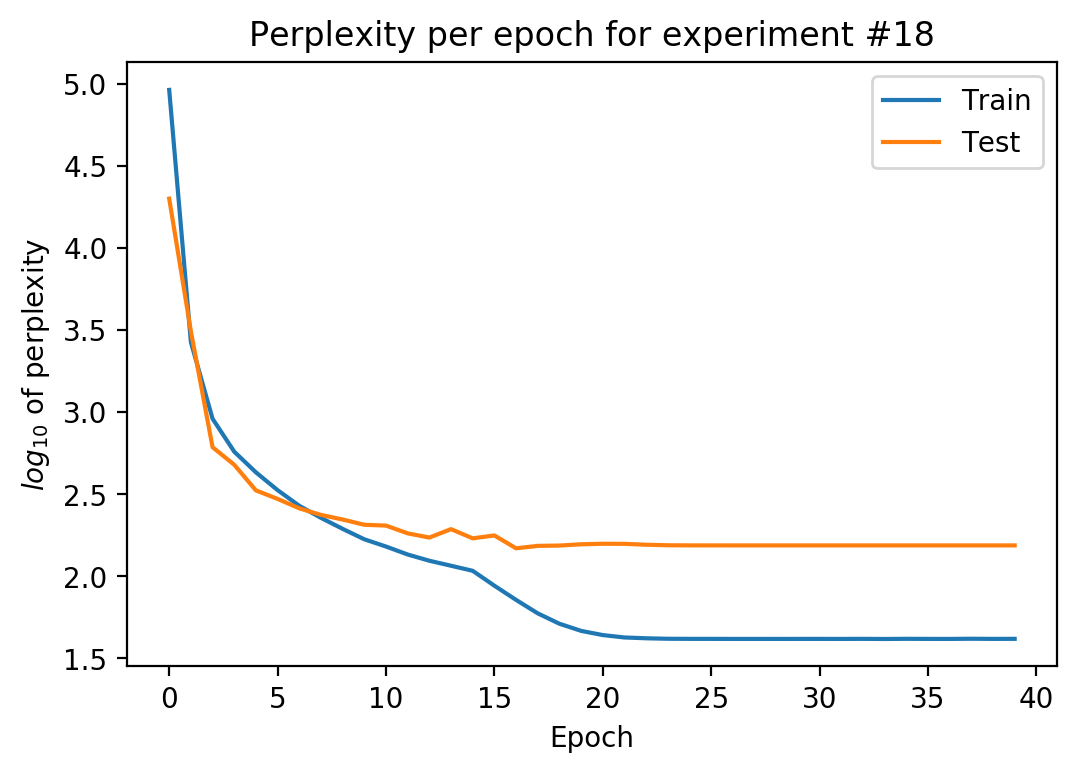

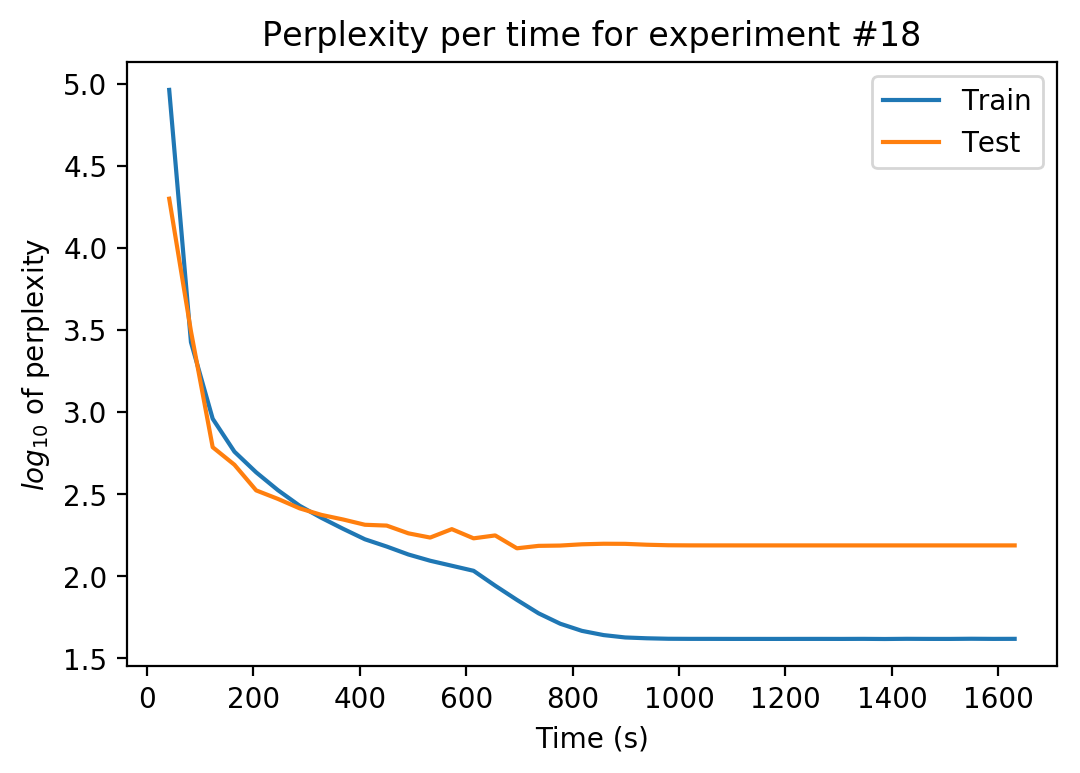

In [40]:
n_exp = 0
for path in [f2.path+'/' for f1 in ["./results/PB4_1/", "./results/PB4_2/",\
            "./results/PB4_3/"] for f2 in os.scandir(f1) if f2.is_dir()]:
    n_exp += 1
    tmp = np.load(path+"learning_curves.npy")[()]
    for line in  open(path+"exp_config.txt", "r").read().split("\n")[:-1]:
        key, value = line.split()
        tmp[key] = value
    tmp["epoch"] = [i for i in range(len(tmp["train_ppls"]))]
    tmp["epoch_time"] = epoch_time(path+"log.txt")
    tmp["cumulative_epoch_time"] = cumulative_epoch_time(tmp["epoch_time"])
    for key in tmp.keys():
        experiments[key].append(tmp[key])
    experiments["best_train"].append(min(tmp["train_ppls"]))
    experiments["best_val"].append(min(tmp["val_ppls"]))
    experiments["n_exp"].append(n_exp)
    
    
    config = f"    EXPERIMENT #{n_exp} CONFIGURATION\n\n"
    config += "{:20}{}\n".format("model", tmp["model"])
    config += "{:20}{}\n".format("optimizer", tmp["optimizer"])
    config += "{:20}{}\n".format("hidden_size", tmp["hidden_size"])
    config += "{:20}{}\n".format("num_layers", tmp["num_layers"])
    config += "{:20}{}\n".format("emb_size", tmp["emb_size"])
    config += "{:20}{}\n".format("initial_lr", tmp["initial_lr"])
    config += "{:20}{}\n".format("seq_len", tmp["seq_len"])
    config += "{:20}{}\n".format("num_epochs", tmp["num_epochs"])
    config += "{:20}{}\n".format("seed", tmp["seed"])
    config += "{:20}{}".format("dp_keep_prob", tmp["dp_keep_prob"])

    fig = plt.figure(dpi=200)
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.add_subplot(1,1,1)
    plt.text(0, 0,config , fontsize=14, ha="left")
    plt.axis("off")
    
    fig = plt.figure(dpi=200)
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.add_subplot(1,1,1)
    plt.plot(tmp["epoch"],np.log10(tmp["train_ppls"]), label="Train")
    plt.plot(tmp["epoch"],np.log10(tmp["val_ppls"]), label="Test")
    plt.legend()
    plt.title(f"Perplexity per epoch for experiment #{n_exp}")
    plt.ylabel("$log_{10}$ of perplexity")
    plt.xlabel("Epoch")
    
    fig = plt.figure(dpi=200)
    fig.subplots_adjust(hspace=0.2, wspace=0.1)
    fig.add_subplot(1,1,1)
    plt.plot(tmp["cumulative_epoch_time"],np.log10(tmp["train_ppls"]), label="Train")
    plt.plot(tmp["cumulative_epoch_time"],np.log10(tmp["val_ppls"]), label="Test")
    plt.legend()
    plt.title(f"Perplexity per time for experiment #{n_exp}")
    plt.ylabel("$log_{10}$ of perplexity")
    plt.xlabel("Time (s)")

------------------

### Summary of all experiements

In [41]:
df_exp = pd.DataFrame(experiments)
new_df = []
for _, df in df_exp[["n_exp","model","optimizer","best_train","best_val"]].sort_values(by="best_val").groupby(["model","optimizer"]):
    new_df.append(df)
new_df = pd.concat(new_df)
new_df.to_s

n_exp        model        optimizer   best_train     best_val
3       4          GRU             ADAM    59.658955   107.768812
7       8          GRU              SGD    50.207869   110.979425
13     14          GRU  SGD_LR_SCHEDULE    67.557846   101.110115
1       2          GRU  SGD_LR_SCHEDULE    65.449968   101.672041
16     17          GRU  SGD_LR_SCHEDULE    66.537633   102.146268
14     15          GRU  SGD_LR_SCHEDULE    30.563514   111.991201
9      10          RNN             ADAM    70.900342   152.138928
15     16          RNN             ADAM   126.155860   154.495147
2       3          RNN             ADAM   121.284914   157.490585
10     11          RNN             ADAM   117.986044   162.044128
5       6          RNN              SGD  3066.318002  2255.083078
6       7          RNN  SGD_LR_SCHEDULE   229.318845   195.639047
8       9  TRANSFORMER             ADAM     3.142067   131.303223
4       5  TRANSFORMER              SGD    27.769659   156.867431
0       1  TRANSFORMER  SGD_LR_SCHEDULE    65.809879   140.093530
17     18  TRANSFORMER  SGD_LR_SCHEDULE    41.571746   148.341624
12     13  TRANSFORMER  SGD_LR_SCHEDULE   180.960617   212.408907
11     12  TRANSFORMER  SGD_LR_SCHEDULE   171.223113   222.575939

In [133]:
print(new_df.to_latex(index=False))

\begin{tabular}{rllrr}
\toprule
 n\_exp &        model &        optimizer &   best\_train &     best\_val \\
\midrule
     4 &          GRU &             ADAM &    59.658955 &   107.768812 \\
     8 &          GRU &              SGD &    50.207869 &   110.979425 \\
    14 &          GRU &  SGD\_LR\_SCHEDULE &    67.557846 &   101.110115 \\
     2 &          GRU &  SGD\_LR\_SCHEDULE &    65.449968 &   101.672041 \\
    17 &          GRU &  SGD\_LR\_SCHEDULE &    66.537633 &   102.146268 \\
    15 &          GRU &  SGD\_LR\_SCHEDULE &    30.563514 &   111.991201 \\
    10 &          RNN &             ADAM &    70.900342 &   152.138928 \\
    16 &          RNN &             ADAM &   126.155860 &   154.495147 \\
     3 &          RNN &             ADAM &   121.284914 &   157.490585 \\
    11 &          RNN &             ADAM &   117.986044 &   162.044128 \\
     6 &          RNN &              SGD &  3066.318002 &  2255.083078 \\
     7 &          RNN &  SGD\_LR\_SCHEDULE &   229.318845 & 

---------------
#### Plots per optimizer

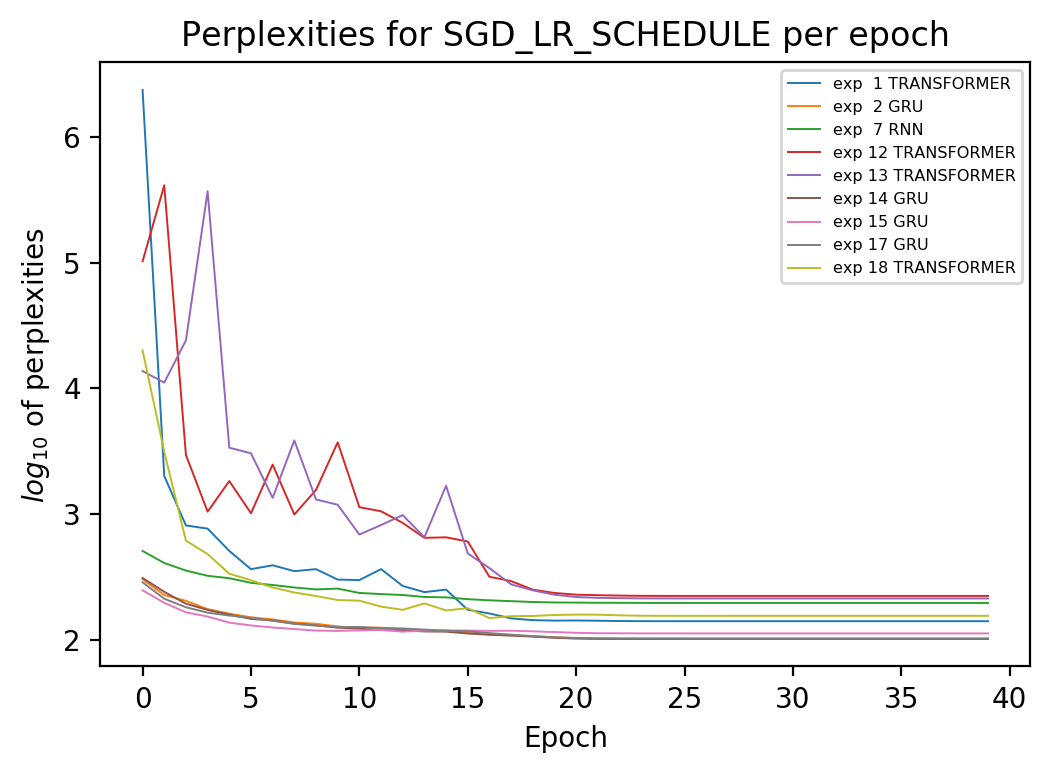

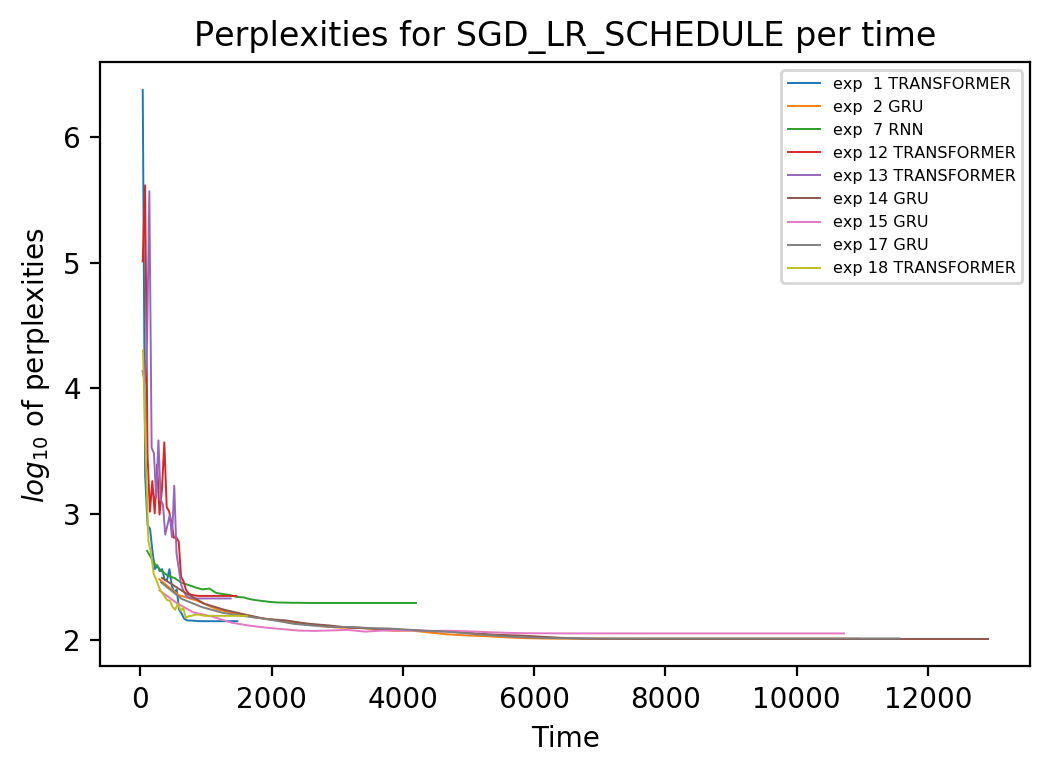

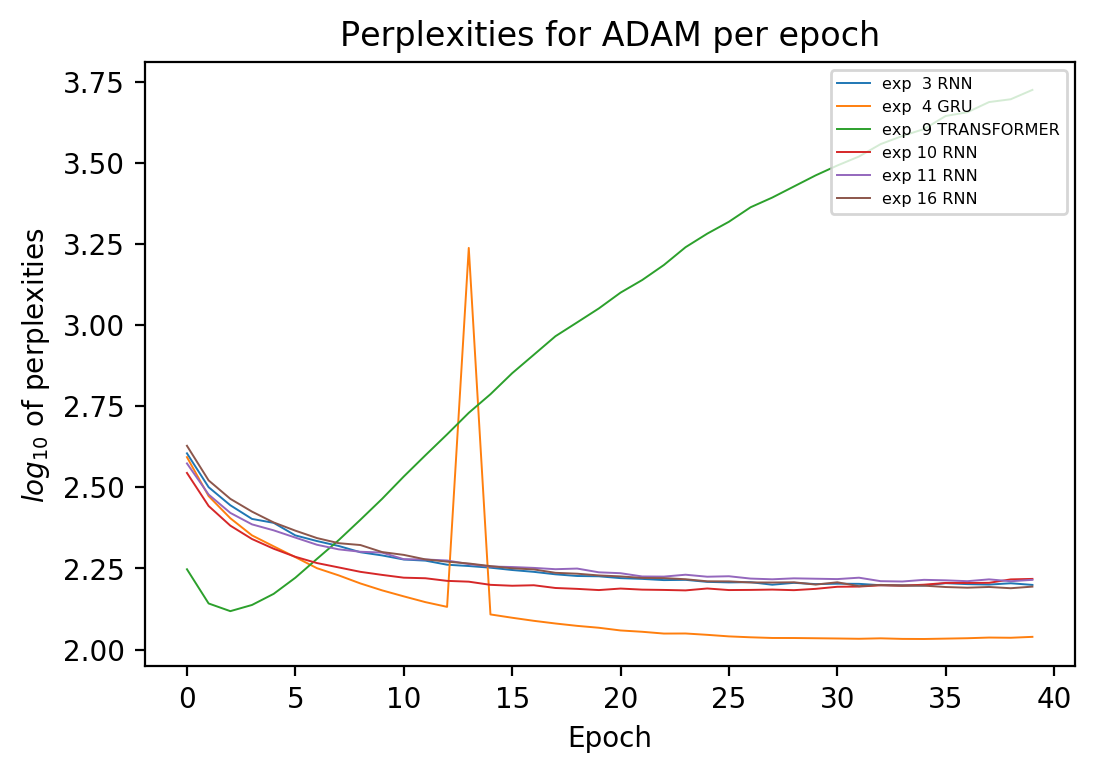

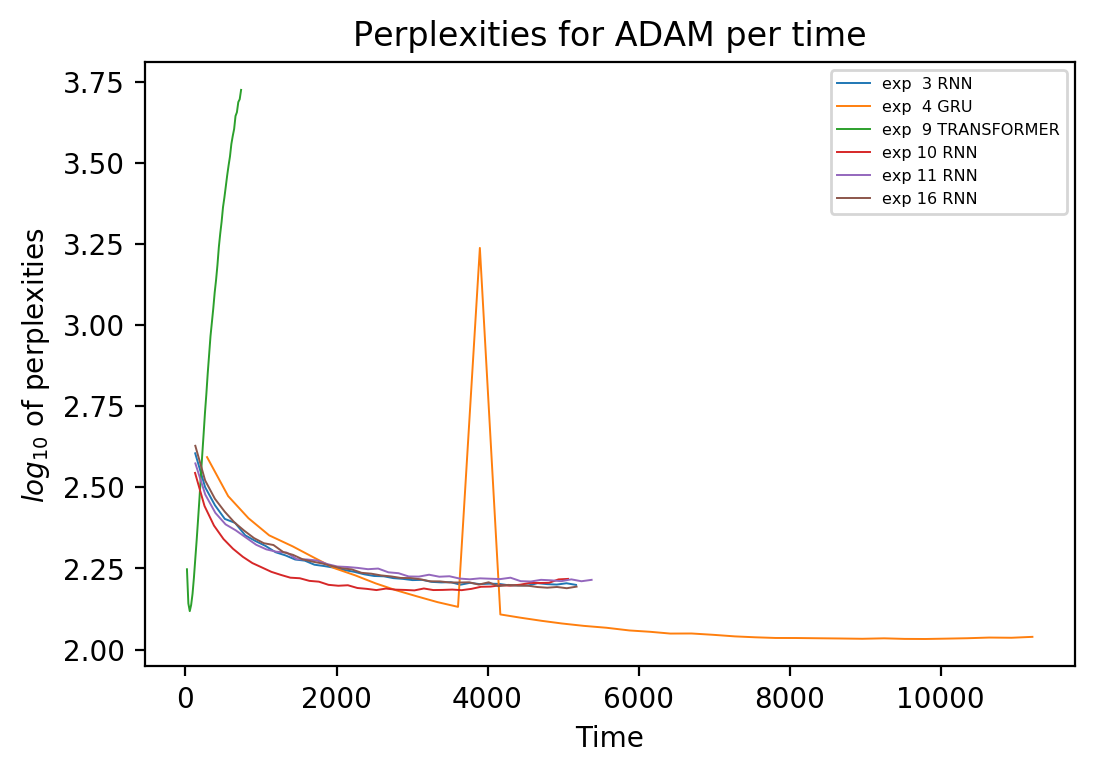

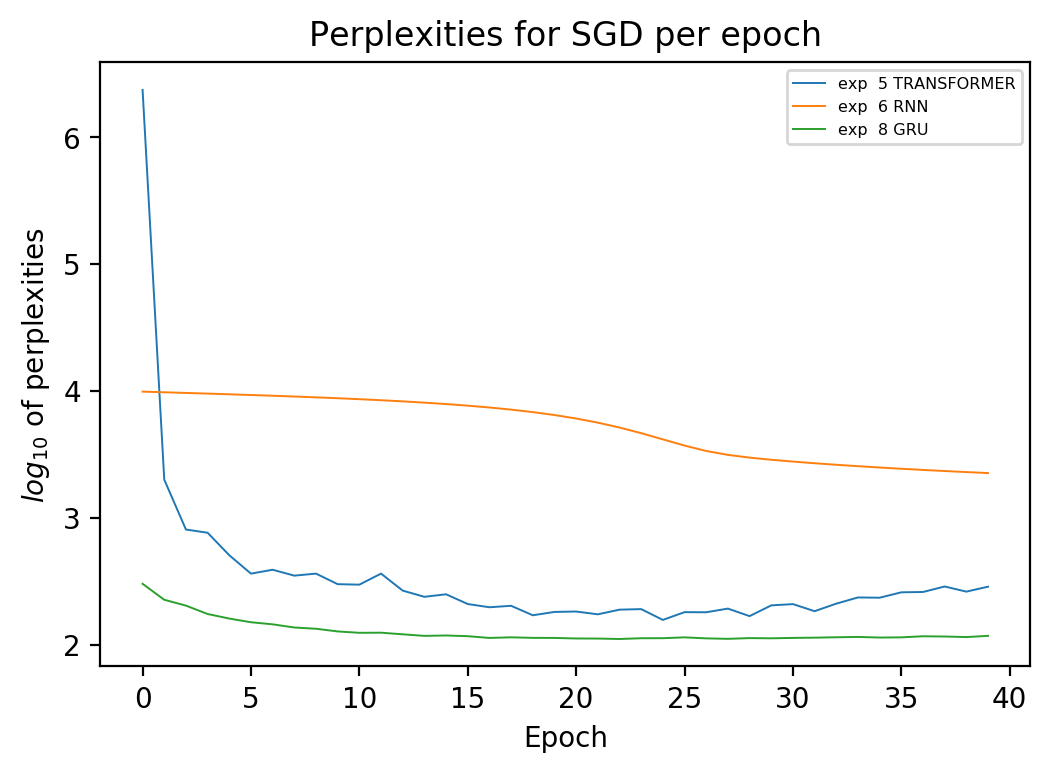

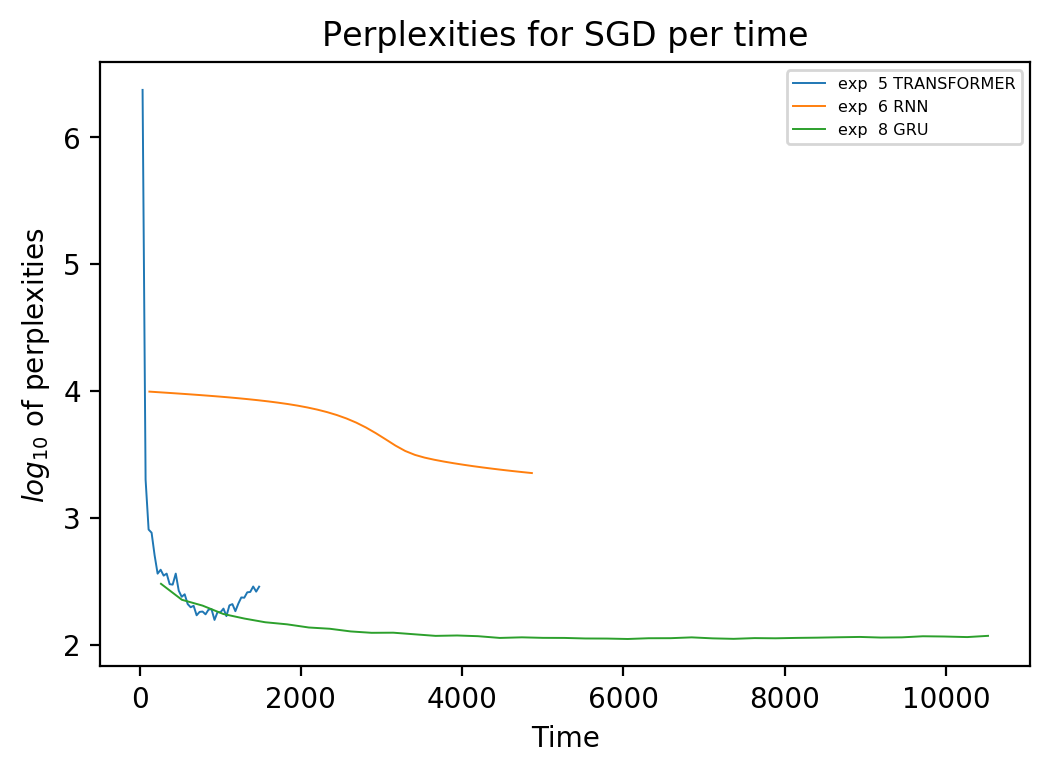

In [129]:
for optimizer in df_exp["optimizer"].drop_duplicates():
    fig = plt.figure(dpi=200)
    color = 0
    for index, row in df_exp.loc[df_exp['optimizer'] == optimizer].iterrows():
        plt.plot(row.epoch, np.log10(row.val_ppls), label="exp{:3} {:4}".format(row.n_exp, row.model), color=f"C{color}", ls="-", linewidth=0.7)
        color = (color + 1)%10
    plt.legend(loc="upper right", fontsize="xx-small")
    plt.title(f"Perplexities for {optimizer} per epoch")
    plt.xlabel("Epoch")
    plt.ylabel("$log_{10}$ of perplexities")
    
    fig = plt.figure(dpi=200)
    color = 0
    for index, row in df_exp.loc[df_exp['optimizer'] == optimizer].iterrows():
        plt.plot(row.cumulative_epoch_time, np.log10(row.val_ppls), label="exp{:3} {:4}".format(row.n_exp, row.model), color=f"C{color}", ls="-", linewidth=0.7)
        color = (color + 1)%10
    plt.legend(loc="upper right", fontsize="xx-small")
    plt.title(f"Perplexities for {optimizer} per time")
    plt.xlabel("Time")
    plt.ylabel("$log_{10}$ of perplexities")

--------
### Plots per architecture

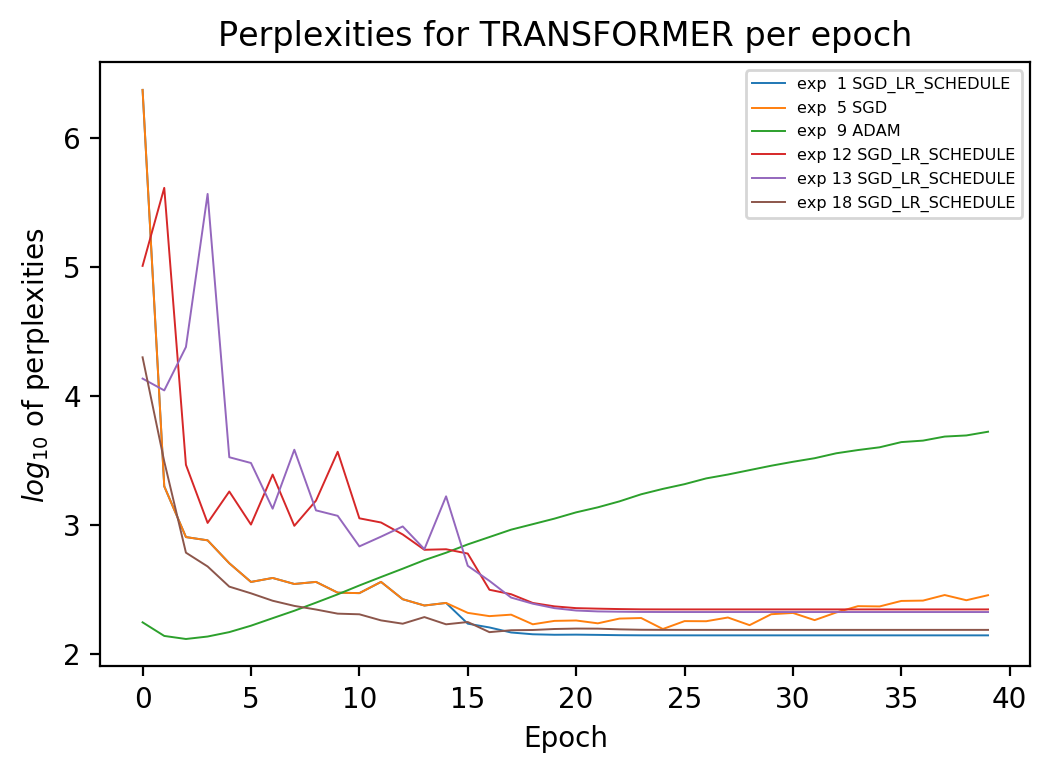

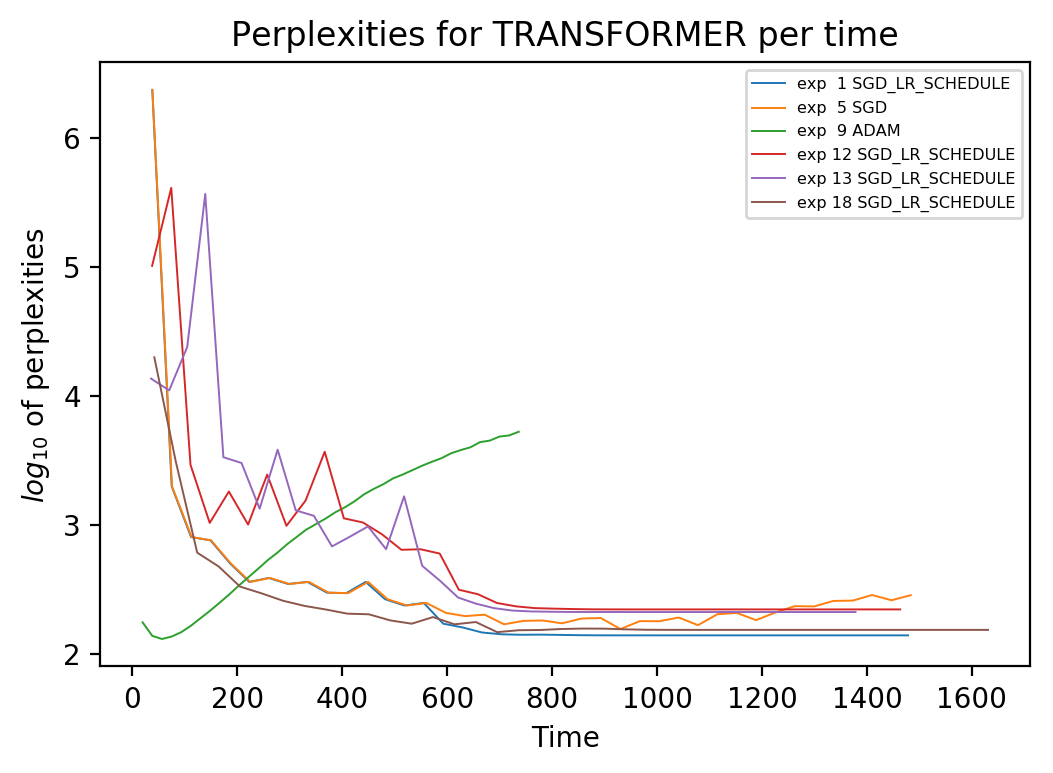

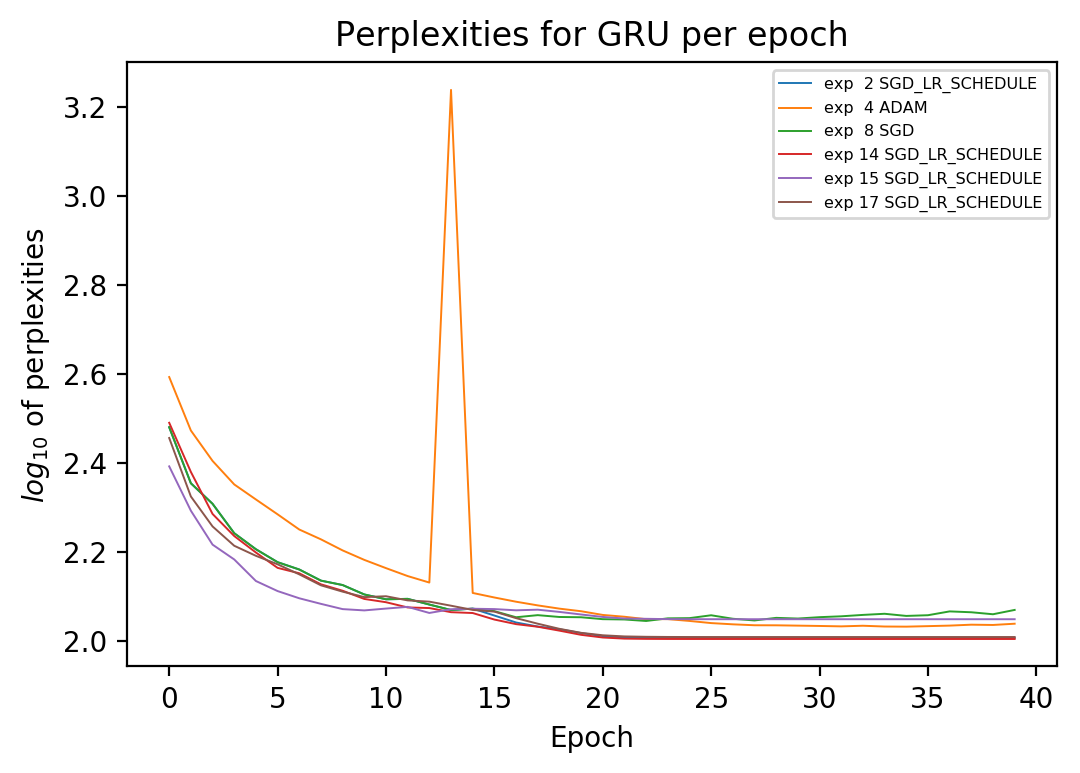

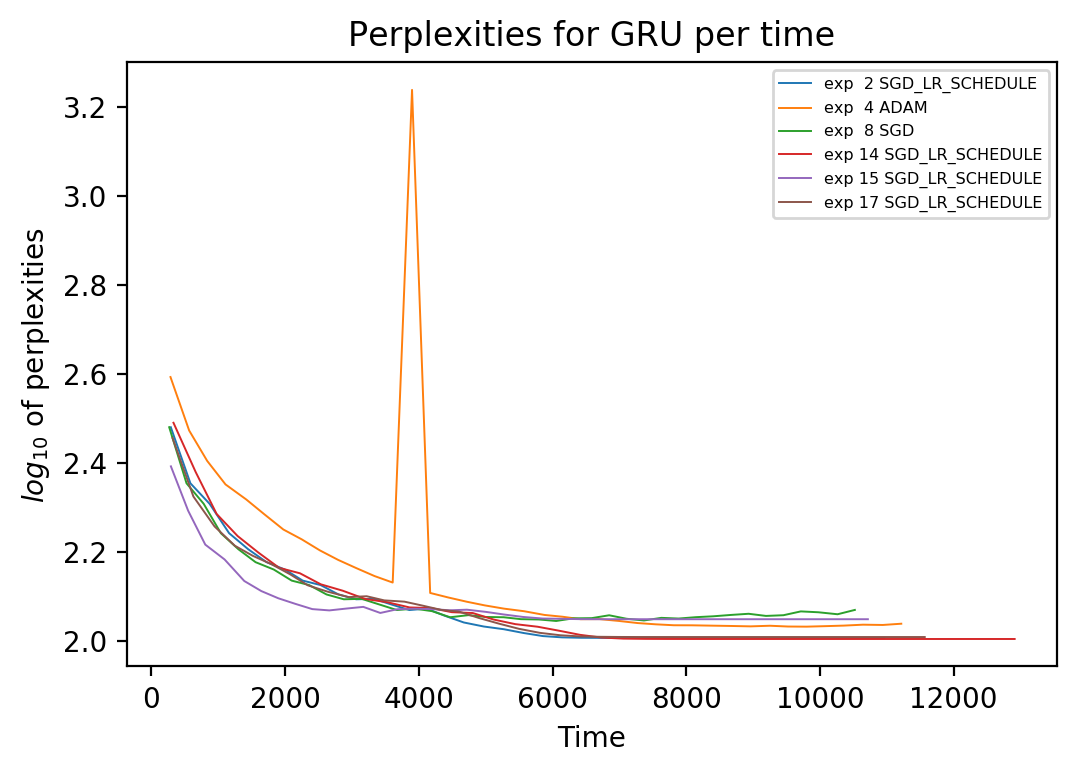

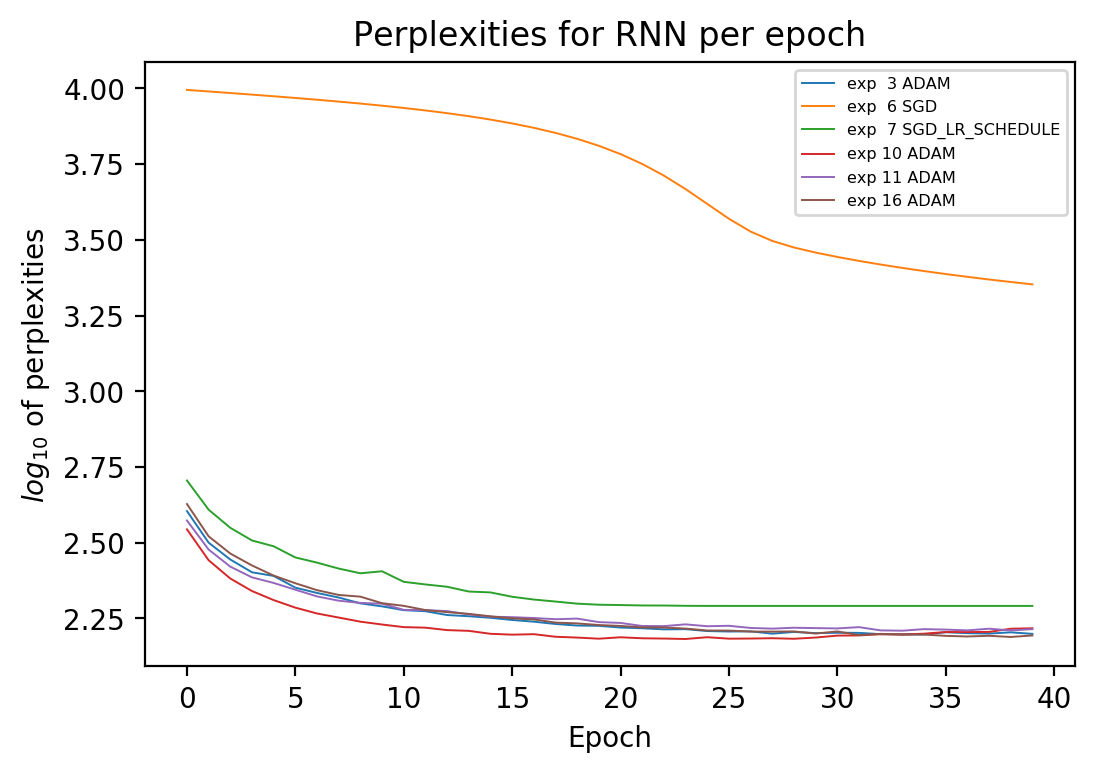

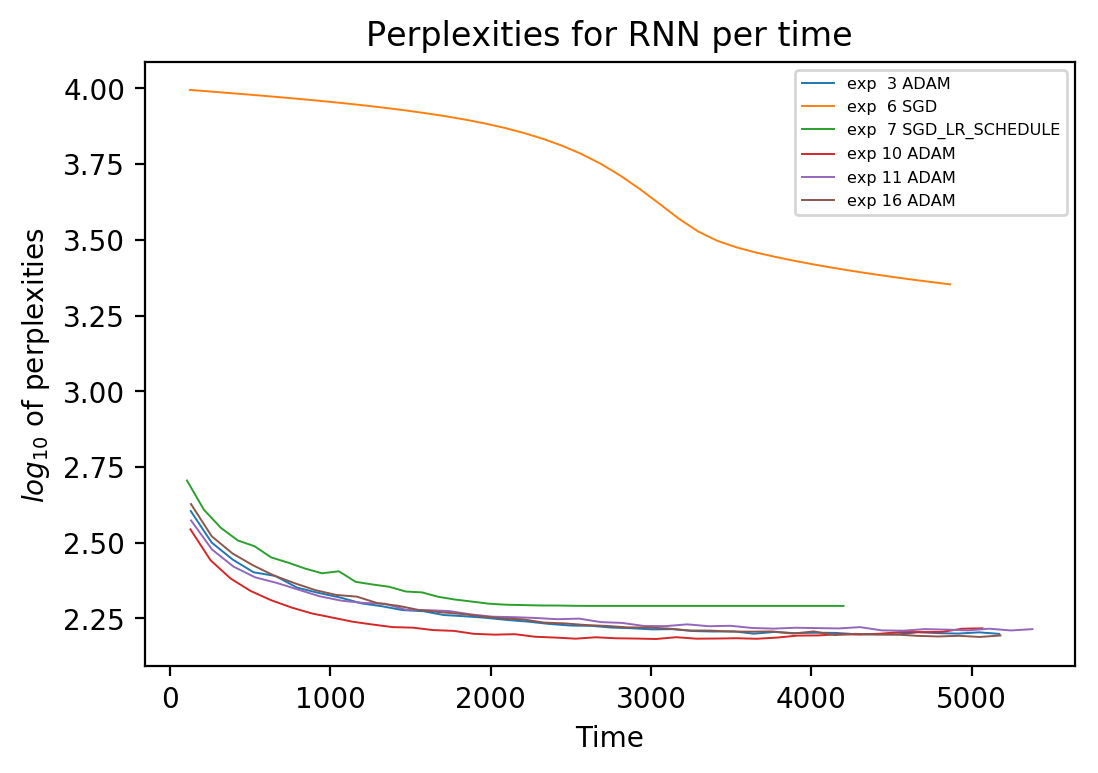

In [127]:
for model in df_exp["model"].drop_duplicates():
    fig = plt.figure(dpi=200)
    color = 0
    for index, row in df_exp.loc[df_exp['model'] == model].iterrows():
        plt.plot(row.epoch, np.log10(row.val_ppls), label="exp{:3} {:4}".format(row.n_exp, row.optimizer), color=f"C{color}", ls="-", linewidth=0.7)
        color = (color + 1)%10
    plt.legend(loc = "upper right", fontsize="xx-small")
    plt.title(f"Perplexities for {model} per epoch")
    plt.xlabel("Epoch")
    plt.ylabel("$log_{10}$ of perplexities")
    
    fig = plt.figure(dpi=200)
    color = 0
    for index, row in df_exp.loc[df_exp['model'] == model].iterrows():
        plt.plot(row.cumulative_epoch_time, np.log10(row.val_ppls), label="exp{:3} {:4}".format(row.n_exp, row.optimizer), color=f"C{color}", ls="-", linewidth=0.7)
        color = (color + 1)%10
    plt.legend(loc = "upper right", fontsize="xx-small")
    plt.title(f"Perplexities for {model} per time")
    plt.xlabel("Time")
    plt.ylabel("$log_{10}$ of perplexities")